<h1><font color = "blue">Credit EDA Case Study - Submission by Nistha Kumar & Gaurav Rana</font><h1>
<h2>Submission Date : 21-Jun-20<h2>
<hr>

# <font color ="blue"> Step 1 : Data Import </font>

In [1]:
# pre-requiste : following two csvs to be placed in a folder 'data' - at the same location where this notebook is saved
# 1. application_data.csv
# 2. previous_application.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_info_columns',200)

df_app = pd.read_csv("application_data.csv")
df_prv = pd.read_csv("previous_application.csv")

# <font color ="blue"> Step 2 : Checking the Structure of Data </font>

In [2]:
# application data preview 
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
# previous application data preview 
df_prv.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [4]:
# overall cols/rows in the dataframes

print(df_app.shape)  # 122 columns
print(df_prv.shape) # 37 columns

(307511, 122)
(1670214, 37)


In [5]:
pd.set_option('display.max_rows', df_app.shape[0]+1)
df_app.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
pd.set_option('display.max_rows', df_prv.shape[0]+1)
df_prv.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [7]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
df_prv.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [9]:
# now looking the central tendency of the columns in application data
# i.e. which are negatively skewed, positively skewed and normally distruted columns
df_app.skew(axis = 0, skipna = True).sort_values()

FLAG_MOBIL                     -554.536744
FLAG_CONT_MOBILE                -23.081172
YEARS_BEGINEXPLUATATION_MEDI    -15.573124
YEARS_BEGINEXPLUATATION_AVG     -15.515264
YEARS_BEGINEXPLUATATION_MODE    -14.755318
FLAG_EMP_PHONE                   -1.664886
YEARS_BUILD_MODE                 -1.002305
YEARS_BUILD_MEDI                 -0.962784
YEARS_BUILD_AVG                  -0.962485
FLAG_DOCUMENT_3                  -0.925725
EXT_SOURCE_2                     -0.793576
DAYS_LAST_PHONE_CHANGE           -0.713606
DAYS_REGISTRATION                -0.590872
EXT_SOURCE_3                     -0.409390
DAYS_BIRTH                       -0.115673
EXT_SOURCE_1                     -0.068755
HOUR_APPR_PROCESS_START          -0.028024
SK_ID_CURR                       -0.001200
REGION_RATING_CLIENT_W_CITY       0.059730
REGION_RATING_CLIENT              0.087468
DAYS_ID_PUBLISH                   0.349327
FLOORSMIN_AVG                     0.954197
FLOORSMIN_MEDI                    0.960226
FLOORSMIN_M

In [10]:
# now looking the central tendency of the columns  in previous application data
# i.e. which are negatively skewed, positively skewed and normally distruted columns
df_prv.skew(axis = 0, skipna = True).sort_values()

NFLAG_LAST_APPL_IN_DAY       -16.735924
DAYS_FIRST_DRAWING            -3.601343
DAYS_DECISION                 -1.053080
RATE_INTEREST_PRIVILEGED      -1.007680
HOUR_APPR_PROCESS_START       -0.025629
SK_ID_CURR                    -0.003303
SK_ID_PREV                    -0.000573
NFLAG_INSURED_ON_APPROVAL      0.710754
DAYS_TERMINATION               1.306376
DAYS_LAST_DUE                  1.410473
CNT_PAYMENT                    1.531403
RATE_DOWN_PAYMENT              2.107713
AMT_ANNUITY                    2.692572
DAYS_LAST_DUE_1ST_VERSION      2.779450
AMT_GOODS_PRICE                3.073690
AMT_CREDIT                     3.245815
AMT_APPLICATION                3.391442
DAYS_FIRST_DUE                 4.644096
RATE_INTEREST_PRIMARY          5.198204
AMT_DOWN_PAYMENT              36.476576
SELLERPLACE_AREA             529.620279
dtype: float64

### <font color="red"> Note : This skewness has to be looked at again once the data types are fixed, and categorical and continous variables are correctly identified</font>

# <font color ="blue"> Step 3 : Data Quality Check </font>

### <font color ="green"> Step 3a : NULL handling </font>

In [11]:
#before deleting columns
df_app.shape

(307511, 122)

In [12]:
# stored all columns and their null percentages in a series
nullseries = 100*df_app.isnull().sum().sort_values(ascending=False)/len(df_app)

In [13]:
nullseries

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [14]:
# out of 122 columns find how many have more than 40% null values
len(nullseries[nullseries>40].index)

49

In [15]:
df_app.shape

(307511, 122)

In [16]:
# deleting all columns where more than 40% values are NULLS
thresh = len(df_app)*.6
df_app.dropna(thresh = thresh, axis = 1, inplace = True)

In [17]:
#after deleting columns (cols should be 122-49 = 73)
df_app.shape

(307511, 73)

In [18]:
#now we need to analyse and recommend null handling steps for the rest of the columns
#let's find all columns where more than 1% values are nulls
nullseries[(nullseries<= 40) & (nullseries>1)]

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
dtype: float64

In [19]:
nullcols = list(nullseries[(nullseries<= 40) & (nullseries>1)].index)
df_app[nullcols].info()
# as we can see one of these columns OCCUPATION_TYPE seems to be categorical and rest seem to be continious

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
OCCUPATION_TYPE               211120 non-null object
EXT_SOURCE_3                  246546 non-null float64
AMT_REQ_CREDIT_BUREAU_QRT     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_YEAR    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_WEEK    265992 non-null float64
AMT_REQ_CREDIT_BUREAU_MON     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_DAY     265992 non-null float64
AMT_REQ_CREDIT_BUREAU_HOUR    265992 non-null float64
dtypes: float64(7), object(1)
memory usage: 18.8+ MB


In [20]:
# let's look at the categorical variable OCCUPATION_TYPE
df_app.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

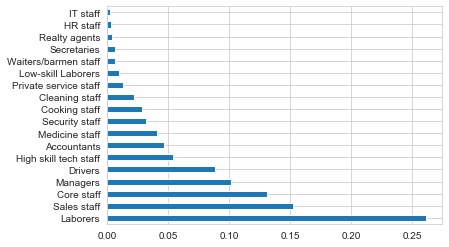

In [21]:
# mode = Laborers (occurs 26% plus)
# let's look at it visually also
df_app.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

### <font color="red"> Note : Hence for "OCCUPATION_TYPE" we should FILL all NULLS with the MODE value which is "Laborers"</font>
#### Sample code : df_app.OCCUPATION_TYPE.fillna(df_app.OCCUPATION_TYPE.mode()[0], inplace=True)

In [22]:
# now let's look at the continous variables
nullcols.remove("OCCUPATION_TYPE")
nullcols

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR']

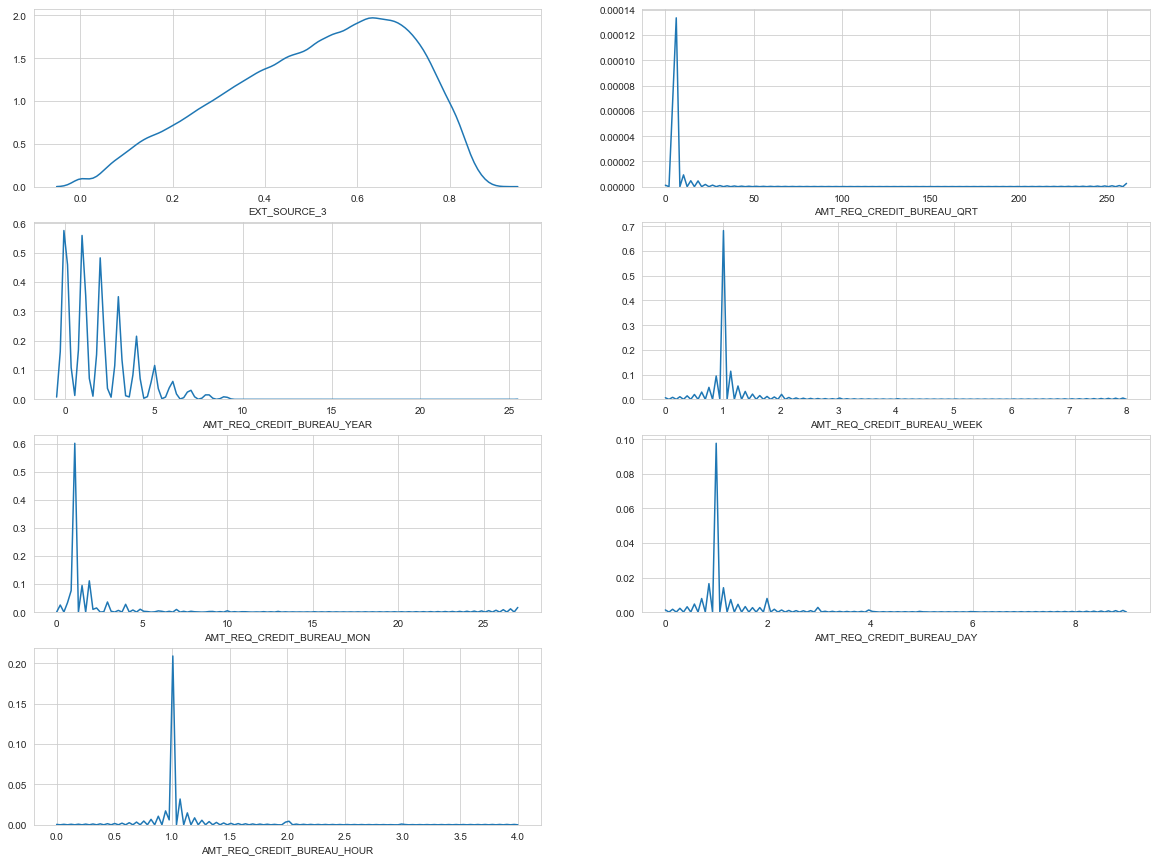

In [23]:
plt.figure(figsize=(20,15))
for colind in range(1,len(nullcols)+1):
    plt.subplot(4,2,colind)
    sns.distplot(df_app[nullcols[colind-1]],hist=False)
plt.show()

In [24]:
# as we can see from above visualizations - except EXT_SOURCE_3 (thst too to some extend) all others are skewed
# as can also be confirmed by the values below

df_app[nullcols].skew().sort_values()

EXT_SOURCE_3                   -0.409390
AMT_REQ_CREDIT_BUREAU_YEAR      1.243590
AMT_REQ_CREDIT_BUREAU_MON       7.804848
AMT_REQ_CREDIT_BUREAU_WEEK      9.293573
AMT_REQ_CREDIT_BUREAU_HOUR     14.534062
AMT_REQ_CREDIT_BUREAU_DAY      27.043505
AMT_REQ_CREDIT_BUREAU_QRT     134.365776
dtype: float64

### <font color="red"> Note : </font>
### <font color="red"> - All columns seem to have random reason for being NULL hence should be imputed</font>
### <font color="red"> - for EXT_SOURCE_3 - skewness is very less, hence MEAN can be considered to be the NULL IMPUTING STATISTIC </font>
### <font color="red"> - For all other colmns - they are all skewed , hence MEDIAN should be used </font>

In [25]:
df_app[nullcols].describe()
# first column - take mean
# rest take median (50% percentile)

EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
count  246546.000000              265992.000000               265992.000000   
mean        0.510853                   0.265474                    1.899974   
std         0.194844                   0.794056                    1.869295   
min         0.000527                   0.000000                    0.000000   
25%         0.370650                   0.000000                    0.000000   
50%         0.535276                   0.000000                    1.000000   
75%         0.669057                   0.000000                    3.000000   
max         0.896010                 261.000000                   25.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

### Let's follow the same steps for df_prv

In [26]:
#before deleting columns
df_prv.shape

(1670214, 37)

In [27]:
# stored all columns and their null percentages in a series
nullseries = 100*df_prv.isnull().sum().sort_values(ascending=False)/len(df_prv)
nullseries

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
NAME_TYPE_SUITE                49.119754
DAYS_TERMINATION               40.298129
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_FIRST_DRAWING             40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_LAST_DUE                  40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [28]:
# out of 37 columns find how many have more than 40% null values
len(nullseries[nullseries>40].index)

11

In [29]:
# deleting all columns where more than 40% values are NULLS
thresh = len(df_prv)*.6
df_prv.dropna(thresh = thresh, axis = 1, inplace = True)

#after deleting columns (cols should be 37-11 = 26)
df_prv.shape

(1670214, 26)

In [30]:
#now we need to analyse and recommend null handling steps for the rest of the columns
#let's find all columns where more than 1% values are nulls
nullseries[(nullseries<= 40) & (nullseries>1)]

nullcols = list(nullseries[(nullseries<= 40) & (nullseries>1)].index)
df_prv[nullcols].info()
# as we can see three columns shown (which have ~ 22-23% null values are all continous)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 3 columns):
AMT_GOODS_PRICE    1284699 non-null float64
AMT_ANNUITY        1297979 non-null float64
CNT_PAYMENT        1297984 non-null float64
dtypes: float64(3)
memory usage: 38.2 MB


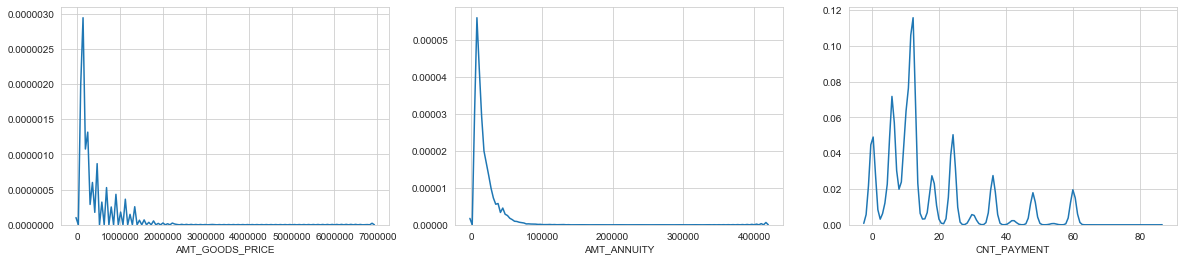

In [31]:
# Let's look at the distribution of these columns

plt.figure(figsize=(20,4))
for colind in range(1,len(nullcols)+1):
    plt.subplot(1,3,colind)
    sns.distplot(df_prv[nullcols[colind-1]],hist=False)
plt.show()

In [32]:
# all these columns are skewed

df_prv[nullcols].skew().sort_values()

CNT_PAYMENT        1.531403
AMT_ANNUITY        2.692572
AMT_GOODS_PRICE    3.073690
dtype: float64

### <font color="red"> Note : </font>
### <font color="red"> - All columns seem to have random reason for being NULL hence should be imputed</font>
### <font color="red"> - for all three columns, MEDIAN statisic to be used for NULL imputation</font>

### <font color ="green"> Step 3b : Incorrect Datatype handling </font>

#### there are some columns which have negative values - they all seem to be relative dates

In [33]:
datecols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

In [34]:
df_app[datecols].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   DAYS_LAST_PHONE_CHANGE  
0                 -1134.0  
1                  -828.0  
2                  -815.0  
3                  -617.0  
4                 -1106.0

In [35]:
# all are defined as integers of floats
df_app[datecols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 5 columns):
DAYS_BIRTH                307511 non-null int64
DAYS_EMPLOYED             307511 non-null int64
DAYS_REGISTRATION         307511 non-null float64
DAYS_ID_PUBLISH           307511 non-null int64
DAYS_LAST_PHONE_CHANGE    307510 non-null float64
dtypes: float64(2), int64(3)
memory usage: 11.7 MB


In [36]:
# Let's convert them to dates with a reference date of 01/01/2020
import datetime
refdate = datetime.datetime(2020, 1, 1)

In [37]:
# for each of these columns :
# created a temporary column with date type (based on reference date, 
# deleted the original column and
# renamed the temporary col to the original columns

for oldcol in datecols:
    newcolname = oldcol+'_dttm'
    df_app[newcolname] = refdate + pd.to_timedelta(df_app[oldcol], unit='d')
    df_app.drop(oldcol,axis=1,inplace=True)
    df_app.rename(columns={newcolname:oldcol}, inplace=True)

In [38]:
# now all the columns have proper dates
df_app[datecols].head()

DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH  \
0 1994-02-05    2018-04-04        2010-01-05      2014-03-13   
1 1974-02-06    2016-09-30        2016-10-02      2019-03-16   
2 1967-11-09    2019-05-21        2008-05-03      2013-01-26   
3 1967-12-20    2011-09-06        1993-01-29      2013-04-30   
4 1965-06-06    2011-09-07        2008-03-13      2010-07-14   

  DAYS_LAST_PHONE_CHANGE  
0             2016-11-23  
1             2017-09-25  
2             2017-10-08  
3             2018-04-24  
4             2016-12-21

In [39]:
# now all the columns have proper datatypes
df_app[datecols].dtypes

DAYS_BIRTH                datetime64[ns]
DAYS_EMPLOYED             datetime64[ns]
DAYS_REGISTRATION         datetime64[ns]
DAYS_ID_PUBLISH           datetime64[ns]
DAYS_LAST_PHONE_CHANGE    datetime64[ns]
dtype: object

In [40]:
# similarly in df_prv there is a column days_decision that needs correction
df_prv[["DAYS_DECISION"]].head()

DAYS_DECISION
0            -73
1           -164
2           -301
3           -512
4           -781

In [41]:
df_prv.shape

(1670214, 26)

In [42]:
datecols = ['DAYS_DECISION']

for oldcol in datecols:
    newcolname = oldcol+'_dttm'
    df_prv[newcolname] = refdate + pd.to_timedelta(df_prv[oldcol], unit='d')
    df_prv.drop(oldcol,axis=1,inplace=True)
    df_prv.rename(columns={newcolname:oldcol}, inplace=True)

In [43]:
# after correction
df_prv[["DAYS_DECISION"]].head()

DAYS_DECISION
0    2019-10-20
1    2019-07-21
2    2019-03-06
3    2018-08-07
4    2017-11-11

In [44]:
df_prv.shape

(1670214, 26)

### Now we would check whether categorical and continuous variables are correctly data-typed

##### first in application data

In [45]:
# find all columns and their respective unique values
coluniqvals = df_app.nunique().sort_values()

In [46]:
# sceanrio 1 : first try to find if there is any column with more than 8 values which is marked as categorical
for colname,uniqvals in coluniqvals.iteritems():
    if df_app[colname].dtype == "object" and uniqvals > 8:
        print("potential error 1 : column marked as categorical -has many values : ",colname,uniqvals,df_app[colname].dtype)

potential error 1 : column marked as categorical -has many values :  OCCUPATION_TYPE 18 object
potential error 1 : column marked as categorical -has many values :  ORGANIZATION_TYPE 58 object


In [47]:
# first column is not an error - seems fine as a categorical even if values are more (18)
df_app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [48]:
# second column is not an error - seems fine as a categorical even if values are more (58)
df_app.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [49]:
# sceanrio 2 : try to find if there is any column which has less number of values which are NOT marked as categorical
poterr=[]
for colname,uniqvals in coluniqvals.iteritems():
    if df_app[colname].dtype != "object" and uniqvals <= 8:
        print("potential error 2 : column NOT marked as categorical- less values : ",colname,uniqvals,df_app[colname].dtype)
        poterr.append(colname)

potential error 2 : column NOT marked as categorical- less values :  LIVE_REGION_NOT_WORK_REGION 2 int64
potential error 2 : column NOT marked as categorical- less values :  FLAG_DOCUMENT_15 2 int64
potential error 2 : column NOT marked as categorical- less values :  FLAG_DOCUMENT_14 2 int64
potential error 2 : column NOT marked as categorical- less values :  FLAG_DOCUMENT_13 2 int64
potential error 2 : column NOT marked as categorical- less values :  REG_REGION_NOT_LIVE_REGION 2 int64
potential error 2 : column NOT marked as categorical- less values :  REG_REGION_NOT_WORK_REGION 2 int64
potential error 2 : column NOT marked as categorical- less values :  REG_CITY_NOT_LIVE_CITY 2 int64
potential error 2 : column NOT marked as categorical- less values :  REG_CITY_NOT_WORK_CITY 2 int64
potential error 2 : column NOT marked as categorical- less values :  LIVE_CITY_NOT_WORK_CITY 2 int64
potential error 2 : column NOT marked as categorical- less values :  FLAG_DOCUMENT_12 2 int64
potential 

In [50]:
len(poterr)

36

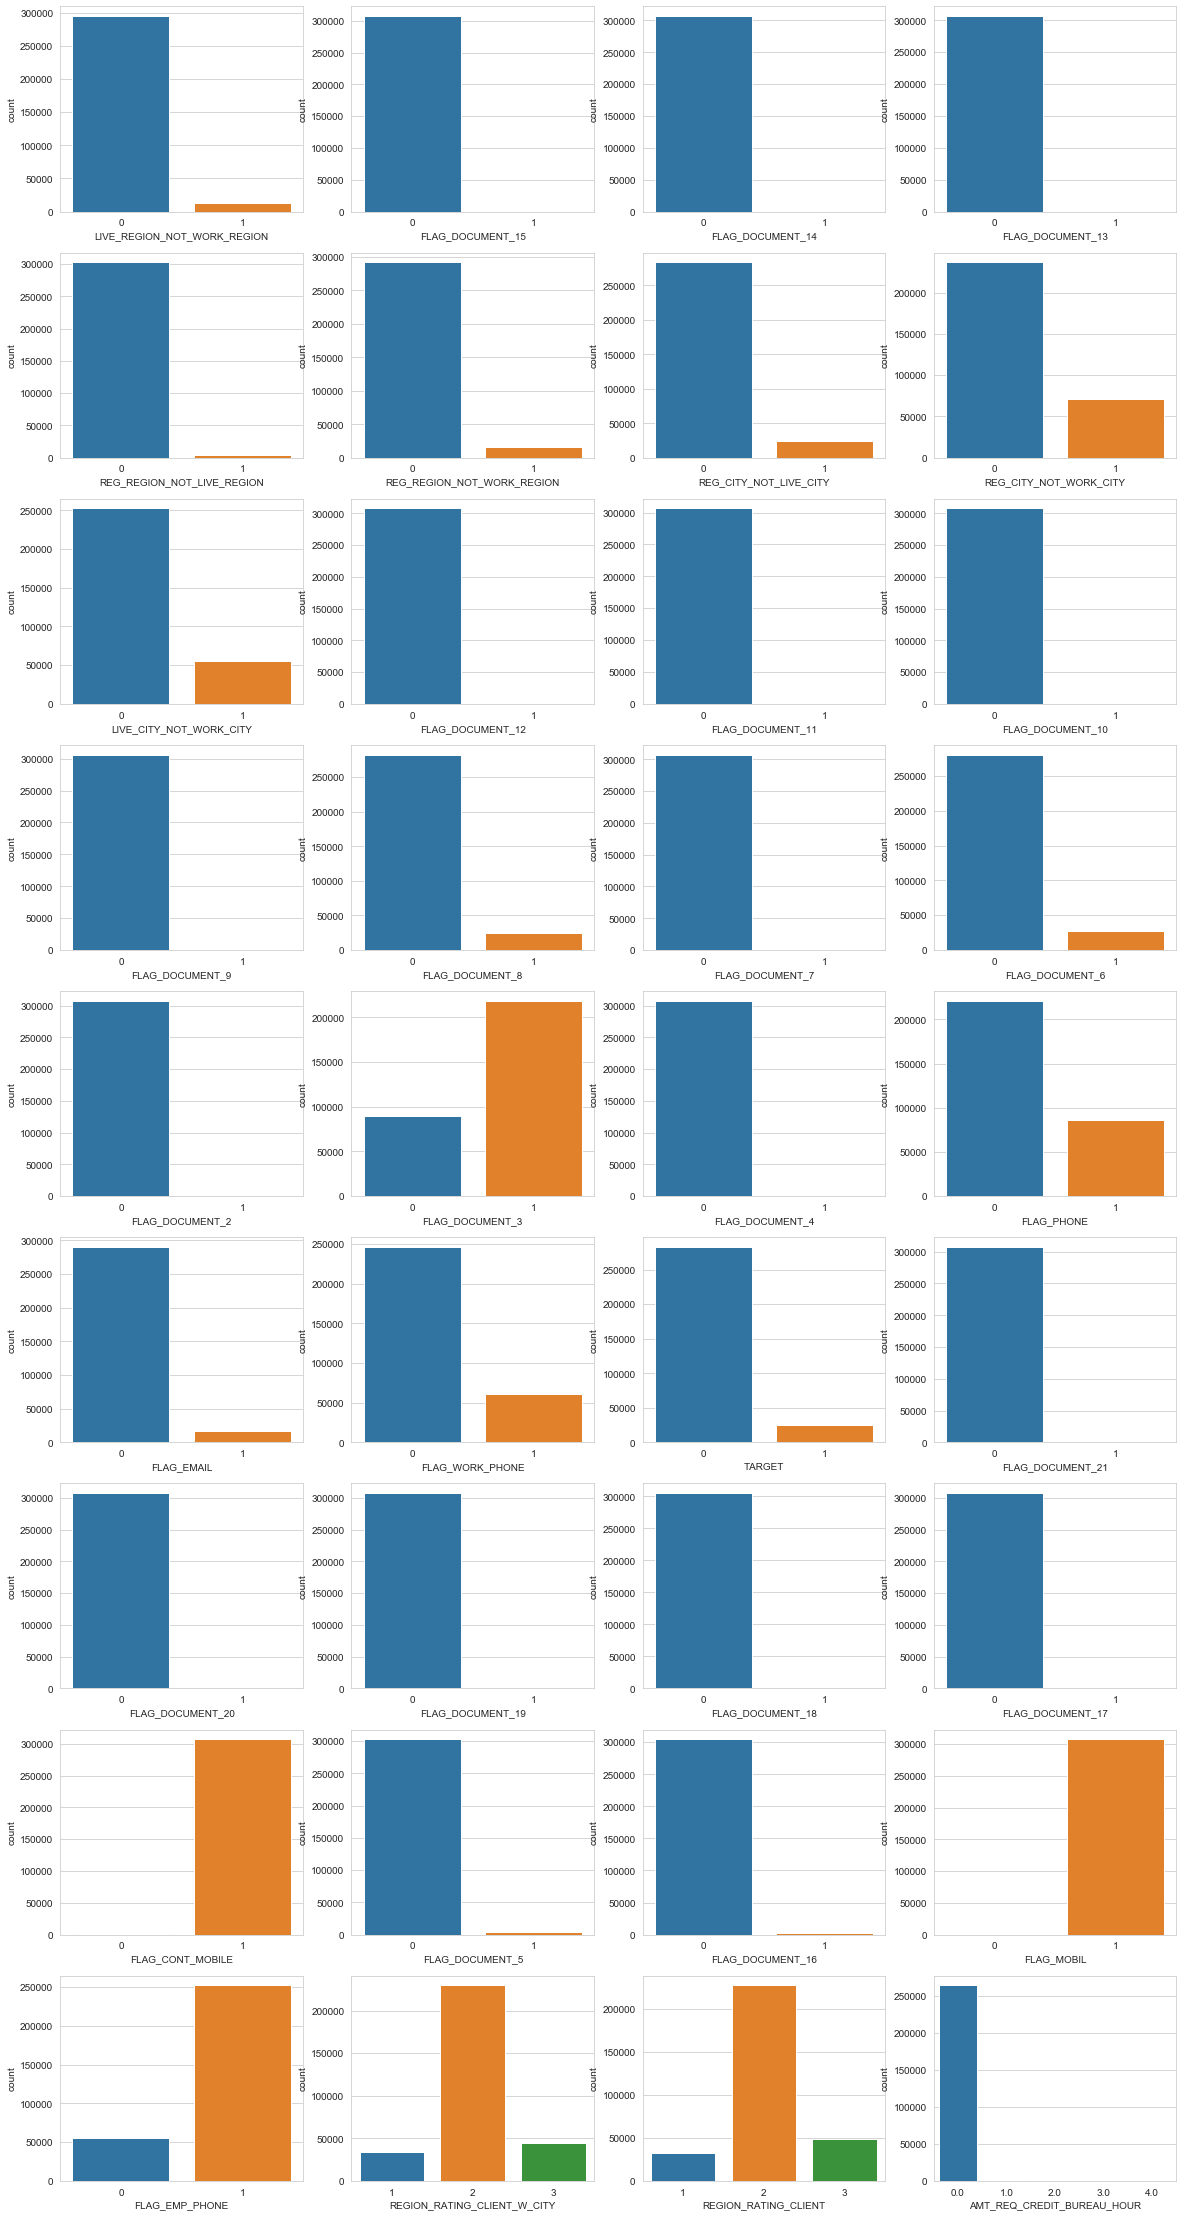

In [51]:
# Let's look at these columns

plt.figure(figsize=(20,40))
for colind in range(1,len(poterr)+1):
    plt.subplot(9,4,colind)
    sns.countplot(df_app[poterr[colind-1]])
plt.show()

In [52]:
# as all of them are categorical EXCEPT AMT_REQ_CREDIT_BUREAU_HOUR
poterr.remove('AMT_REQ_CREDIT_BUREAU_HOUR')

In [53]:
# before change - all are non-objects
df_app[poterr].dtypes

LIVE_REGION_NOT_WORK_REGION    int64
FLAG_DOCUMENT_15               int64
FLAG_DOCUMENT_14               int64
FLAG_DOCUMENT_13               int64
REG_REGION_NOT_LIVE_REGION     int64
REG_REGION_NOT_WORK_REGION     int64
REG_CITY_NOT_LIVE_CITY         int64
REG_CITY_NOT_WORK_CITY         int64
LIVE_CITY_NOT_WORK_CITY        int64
FLAG_DOCUMENT_12               int64
FLAG_DOCUMENT_11               int64
FLAG_DOCUMENT_10               int64
FLAG_DOCUMENT_9                int64
FLAG_DOCUMENT_8                int64
FLAG_DOCUMENT_7                int64
FLAG_DOCUMENT_6                int64
FLAG_DOCUMENT_2                int64
FLAG_DOCUMENT_3                int64
FLAG_DOCUMENT_4                int64
FLAG_PHONE                     int64
FLAG_EMAIL                     int64
FLAG_WORK_PHONE                int64
TARGET                         int64
FLAG_DOCUMENT_21               int64
FLAG_DOCUMENT_20               int64
FLAG_DOCUMENT_19               int64
FLAG_DOCUMENT_18               int64
F

In [54]:
# convert all others to OBJECT datatype
for col in poterr:
    df_app[col] = df_app[col].astype(object)

In [55]:
# after change - all are non-objects
df_app[poterr].dtypes

LIVE_REGION_NOT_WORK_REGION    object
FLAG_DOCUMENT_15               object
FLAG_DOCUMENT_14               object
FLAG_DOCUMENT_13               object
REG_REGION_NOT_LIVE_REGION     object
REG_REGION_NOT_WORK_REGION     object
REG_CITY_NOT_LIVE_CITY         object
REG_CITY_NOT_WORK_CITY         object
LIVE_CITY_NOT_WORK_CITY        object
FLAG_DOCUMENT_12               object
FLAG_DOCUMENT_11               object
FLAG_DOCUMENT_10               object
FLAG_DOCUMENT_9                object
FLAG_DOCUMENT_8                object
FLAG_DOCUMENT_7                object
FLAG_DOCUMENT_6                object
FLAG_DOCUMENT_2                object
FLAG_DOCUMENT_3                object
FLAG_DOCUMENT_4                object
FLAG_PHONE                     object
FLAG_EMAIL                     object
FLAG_WORK_PHONE                object
TARGET                         object
FLAG_DOCUMENT_21               object
FLAG_DOCUMENT_20               object
FLAG_DOCUMENT_19               object
FLAG_DOCUMEN

In [56]:
# Now in previous application data

In [57]:
# find all columns and their respective unique values
coluniqvals = df_prv.nunique().sort_values()

In [58]:
# sceanrio 1 : first try to find if there is any column with more than 8 values which is marked as categorical
for colname,uniqvals in coluniqvals.iteritems():
    if df_prv[colname].dtype == "object" and uniqvals > 8:
        print("potential error 1 : column marked as categorical -has many values : ",colname,uniqvals,df_prv[colname].dtype)

potential error 1 : column marked as categorical -has many values :  CODE_REJECT_REASON 9 object
potential error 1 : column marked as categorical -has many values :  NAME_SELLER_INDUSTRY 11 object
potential error 1 : column marked as categorical -has many values :  PRODUCT_COMBINATION 17 object
potential error 1 : column marked as categorical -has many values :  NAME_CASH_LOAN_PURPOSE 25 object
potential error 1 : column marked as categorical -has many values :  NAME_GOODS_CATEGORY 28 object


In [59]:
# this is a ligitimate cateforical variable - even if more than 8 entries exist - no action needed
df_prv.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [60]:
# this is a ligitimate cateforical variable - even if more than 8 entries exist - no action needed
df_prv.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [61]:
# this is a ligitimate cateforical variable - even if more than 8 entries exist - no action needed
df_prv.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [62]:
# this is a ligitimate cateforical variable - even if more than 8 entries exist - no action needed
df_prv.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [63]:
# this is a ligitimate cateforical variable - even if more than 8 entries exist - no action needed
df_prv.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [64]:
# sceanrio 2 : try to find if there is any column which has less number of values which are NOT marked as categorical
poterr=[]
for colname,uniqvals in coluniqvals.iteritems():
    if df_prv[colname].dtype != "object" and uniqvals <= 8:
        print("potential error 2 : column NOT marked as categorical- less values : ",colname,uniqvals,df_prv[colname].dtype)
        poterr.append(colname)

potential error 2 : column NOT marked as categorical- less values :  NFLAG_LAST_APPL_IN_DAY 2 int64


In [65]:
df_prv.NFLAG_LAST_APPL_IN_DAY.value_counts()

1    1664314
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [66]:
# this is a flag and hence should be converted into a categorical variable
df_prv["NFLAG_LAST_APPL_IN_DAY"] = df_prv["NFLAG_LAST_APPL_IN_DAY"].astype(object)

In [67]:
df_prv[["NFLAG_LAST_APPL_IN_DAY"]].dtypes

NFLAG_LAST_APPL_IN_DAY    object
dtype: object

### <font color ="green"> Step 3c : Outlier handling </font>

In [68]:
# Let us select top 5 most skewed columns

skewedcols = list(df_app.select_dtypes(exclude=['object']).skew().sort_values().tail(5).index)
skewedcols

['OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_INCOME_TOTAL']

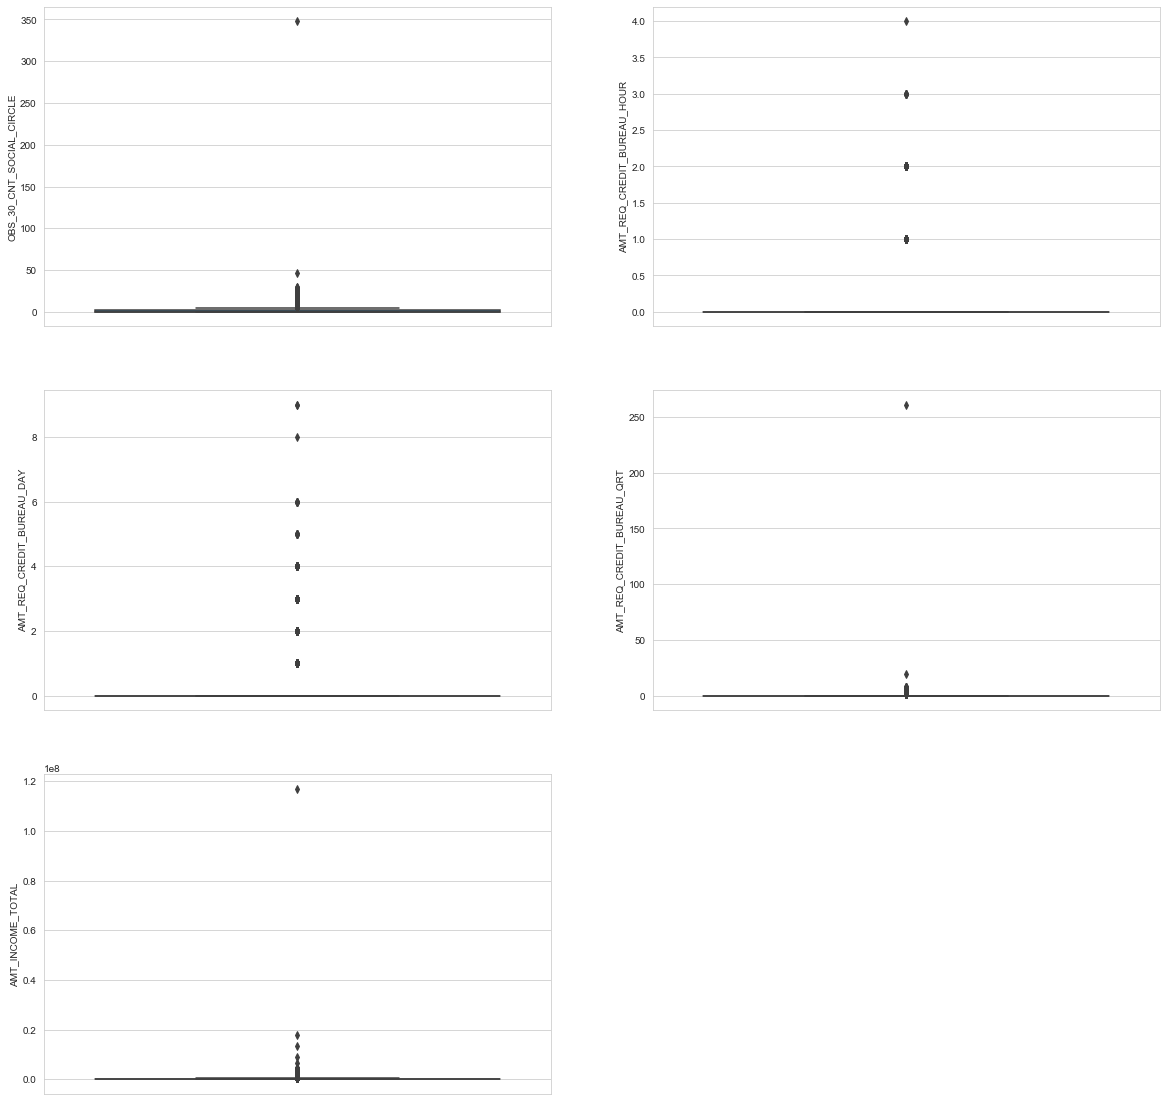

In [69]:
# Let's look at these columns
plt.figure(figsize=(20,20))
for colind in range(1,len(skewedcols)+1):
    plt.subplot(3,2,colind)
    sns.boxplot(y=skewedcols[colind-1],data=df_app)
plt.show()

In [70]:
# Case 1 : 'OBS_30_CNT_SOCIAL_CIRCLE'
df_app['OBS_30_CNT_SOCIAL_CIRCLE'].quantile([0.5,0.75,0.99,0.999,0.9999,1])

0.5000      0.0
0.7500      2.0
0.9900     10.0
0.9990     17.0
0.9999     24.0
1.0000    348.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

### <font color="red"> Note : </font>
### <font color="red"> - OBS_30_CNT_SOCIAL_CIRCLE : values over 24.0 should be deleted (99.99% are within this - rest seems errenous)</font>

In [71]:
# Case 2/3/4 : 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_QRT',
df_app[['AMT_REQ_CREDIT_BUREAU_HOUR',
        'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_QRT']].quantile([0.5,0.75,0.99,0.999,0.99999,1])

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0.50000                         0.0                    0.00000   
0.75000                         0.0                    0.00000   
0.99000                         0.0                    0.00000   
0.99900                         1.0                    1.00000   
0.99999                         3.0                    6.68018   
1.00000                         4.0                    9.00000   

         AMT_REQ_CREDIT_BUREAU_QRT  
0.50000                        0.0  
0.75000                        0.0  
0.99000                        2.0  
0.99900                        4.0  
0.99999                        8.0  
1.00000                      261.0

### <font color="red"> Note : </font>
### <font color="red"> - AMT_REQ_CREDIT_BUREAU_HOUR : no need to handle outliers, there is a possibility of this data</font>
### <font color="red"> - AMT_REQ_CREDIT_BUREAU_DAY : no need to handle outliers, there is a possibility of this data</font>
### <font color="red"> - AMT_REQ_CREDIT_BUREAU_QRT : values over 8 should be deleted. 99.999% values are within this range. then there seem to be some extreme values</font>

In [72]:
# Case 5 : AMT_INCOME_TOTAL
df_app[['AMT_INCOME_TOTAL']].quantile([0.5,0.75,0.99,0.999,0.99999,1])

AMT_INCOME_TOTAL
0.50000      1.471500e+05
0.75000      2.025000e+05
0.99000      4.725000e+05
0.99900      9.000000e+05
0.99999      8.831025e+06
1.00000      1.170000e+08

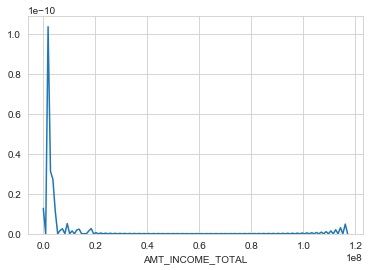

In [73]:
sns.distplot(df_app['AMT_INCOME_TOTAL'], hist=False)
plt.show()

### <font color="red"> Note : </font>
### <font color="red"> - AMT_INCOME_TOTAL : as there can be some people wih very high incomes, we can BIN this data</font>

### <font color ="green"> Step 3d : Data Binning </font>

In [74]:
# Create 5 categories for AMT_INCOME_TOTAL and store in AMT_INCOME_TOTAL_CAT
df_app['AMT_INCOME_TOTAL_CAT'] = pd.qcut(df_app['AMT_INCOME_TOTAL'], 5, labels=["Very Low","Low","Medium","High","Very High"])

In [75]:
df_app[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_CAT']].head()

AMT_INCOME_TOTAL AMT_INCOME_TOTAL_CAT
0          202500.0                 High
1          270000.0            Very High
2           67500.0             Very Low
3          135000.0                  Low
4          121500.0                  Low

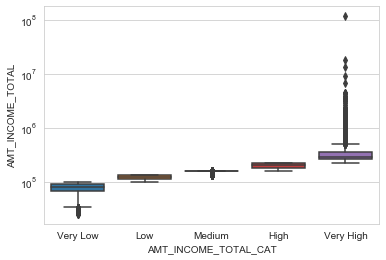

In [76]:
sns.boxplot(y='AMT_INCOME_TOTAL',x='AMT_INCOME_TOTAL_CAT',data=df_app)
plt.yscale("log")
plt.show()

In [77]:
df_app.groupby('AMT_INCOME_TOTAL_CAT')[['AMT_INCOME_TOTAL']].min()

AMT_INCOME_TOTAL
AMT_INCOME_TOTAL_CAT                  
Very Low                       25650.0
Low                            99031.5
Medium                        135256.5
High                          162279.0
Very High                     225112.5

In [78]:
# Binning another column
df_app['HOUR_APPR_PROCESS_START_CAT'] = pd.cut(df_app['HOUR_APPR_PROCESS_START'], [0,12,18,24], labels=["Morning","Afternoon","Evening"])

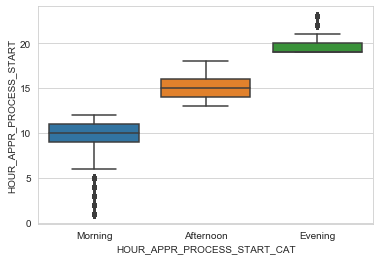

In [79]:
sns.boxplot(y='HOUR_APPR_PROCESS_START',x='HOUR_APPR_PROCESS_START_CAT',data=df_app)
plt.show()

## Binning a column in previous application data

In [80]:
df_prv['HOUR_APPR_PROCESS_START_CAT'] = pd.cut(df_prv['HOUR_APPR_PROCESS_START'], [0,12,18,24], labels=["Morning","Afternoon","Evening"])

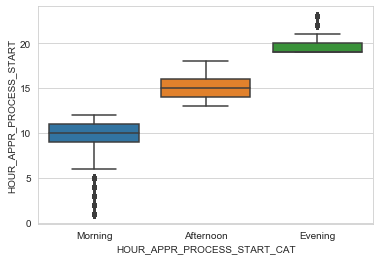

In [81]:
sns.boxplot(y='HOUR_APPR_PROCESS_START',x='HOUR_APPR_PROCESS_START_CAT',data=df_prv)
plt.show()

In [82]:
# now for previous application data
skewedcols = list(df_prv.select_dtypes(exclude=['object']).skew().sort_values().tail(5).index)
skewedcols

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'AMT_APPLICATION',
 'SELLERPLACE_AREA']

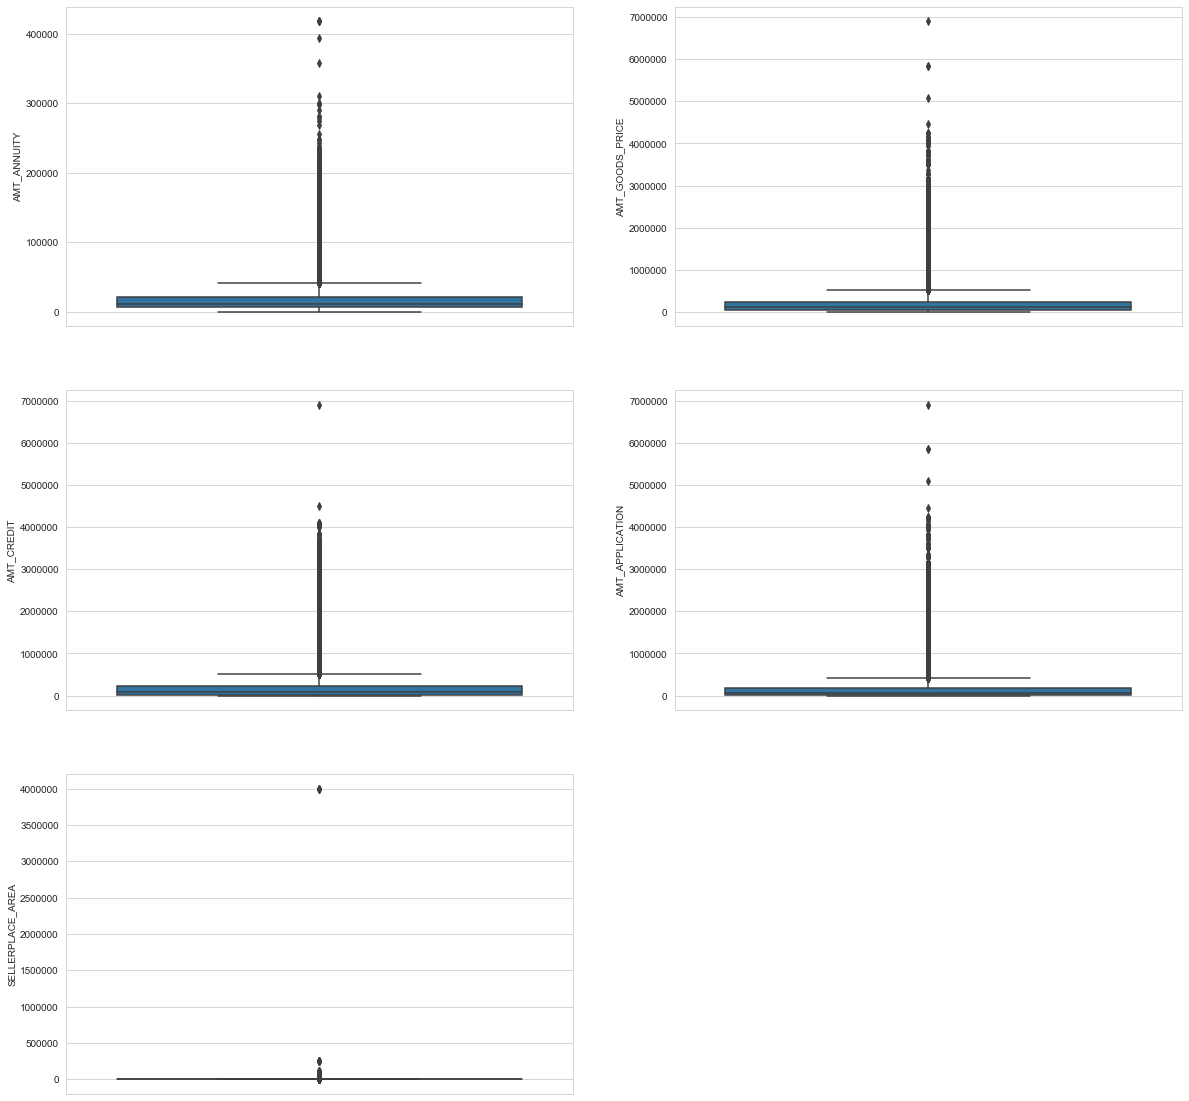

In [83]:
# Let's look at these columns
plt.figure(figsize=(20,20))
for colind in range(1,len(skewedcols)+1):
    plt.subplot(3,2,colind)
    sns.boxplot(y=skewedcols[colind-1],data=df_prv)
plt.show()

### <font color="red"> Note : </font>
### <font color="red"> - All the above columns have outliers, which need to be treated - in similar lines for application data</font>

# <font color ="blue"> Step 4 : Data Analysis (Application Data) </font>

### <font color ="green"> Step 4a : Data Imbalance Check </font>

In [84]:
# Checking the balance of the Target Variable
df_app.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

### <font color="red"> Note : </font>
### <font color="red"> - as we see, the dataframe is heavily imbalanced with ~92% values being 1 and only ~8% values 0</font>

### <font color ="green"> Step 4b : Removing Non-Relevant Columns</font>

In [85]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCL

In [86]:
# Based on descriptions provided by the business = the following columns seem irrelavant for the problem stateent
# Hence dropping them

non_relevant_columns = ['NAME_TYPE_SUITE','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 
                        'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
                        'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
                        'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                        'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                        'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [87]:
# before dropping
df_app.shape

(307511, 75)

In [88]:
# dropping
df_app.drop(non_relevant_columns,axis=1,inplace=True)

In [89]:
# after dropping
df_app.shape

(307511, 44)

In [90]:
# now deleting irrelavant columns from df_prv
df_prv.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_DECISION',
       'HOUR_APPR_PROCESS_START_CAT'],
      dtype='object')

In [91]:
# Based on descriptions provided by the business = the following columns seem irrelavant for the problem stateent
# Hence dropping them

non_relevant_columns = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

In [92]:
# Before dropping
df_prv.shape

(1670214, 27)

In [93]:
# dropping
df_prv.drop(non_relevant_columns,axis=1,inplace=True)

In [94]:
# Before dropping
df_prv.shape

(1670214, 25)

### <font color ="green"> Step 4c : Data Division Based on Target Variable </font>

In [95]:
# original shape of the dataframe
df_app.shape

(307511, 44)

In [96]:
corr = df_app.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr = corr.unstack().reset_index()
corr.columns = ["var1","var2","correlation"]
corr.dropna(subset=["correlation"],inplace=True)
corr["correlationabs"]  = corr["correlation"].abs()
corr.sort_values(by="correlationabs",ascending=False)

var1                        var2  correlation  \
202    OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998490   
83              AMT_GOODS_PRICE                  AMT_CREDIT     0.986968   
113             CNT_FAM_MEMBERS                CNT_CHILDREN     0.879161   
219    DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.860517   
84              AMT_GOODS_PRICE                 AMT_ANNUITY     0.775109   
67                  AMT_ANNUITY                  AMT_CREDIT     0.770138   
203    OBS_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.331571   
186    DEF_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.329338   
220    DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.255570   
218    DEF_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.253499   
254   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR     0.230374   
134                EXT_SOURCE_2  REGION_POPULATION_RELATIVE     0.198924   
66                  AMT_ANNUITY            AMT_INCOME_TOTAL     0.191657   
82              AMT_GOODS_PRICE            AMT_INCOME_TOTAL     0.159610   
50                   AMT_CREDIT            AMT_INCOME_TOTAL     0.156870   
133                EXT_SOURCE_2             AMT_GOODS_PRICE     0.139367   
131                EXT_SOURCE_2                  AMT_CREDIT     0.131228   
132                EXT_SOURCE_2                 AMT_ANNUITY     0.125804   
100  REGION_POPULATION_RELATIVE                 AMT_ANNUITY     0.118429   
152                EXT_SOURCE_3                EXT_SOURCE_2     0.109167   
101  REGION_POPULATION_RELATIVE             AMT_GOODS_PRICE     0.103520   
99   REGION_POPULATION_RELATIVE                  AMT_CREDIT     0.099738   
116             CNT_FAM_MEMBERS                 AMT_ANNUITY     0.075539   
98   REGION_POPULATION_RELATIVE            AMT_INCOME_TOTAL     0.074796   
115             CNT_FAM_MEMBERS                  AMT_CREDIT     0.063160   
117             CNT_FAM_MEMBERS             AMT_GOODS_PRICE     0.061185   
130                EXT_SOURCE_2            AMT_INCOME_TOTAL     0.060925   
149                EXT_SOURCE_3             AMT_GOODS_PRICE     0.047717   
147                EXT_SOURCE_3                  AMT_CREDIT     0.043516   
145                EXT_SOURCE_3                CNT_CHILDREN    -0.042710   
185    DEF_30_CNT_SOCIAL_CIRCLE                EXT_SOURCE_3    -0.036253   
217    DEF_60_CNT_SOCIAL_CIRCLE                EXT_SOURCE_3    -0.034096   
216    DEF_60_CNT_SOCIAL_CIRCLE                EXT_SOURCE_2    -0.032340   
148                EXT_SOURCE_3                 AMT_ANNUITY     0.030752   
184    DEF_30_CNT_SOCIAL_CIRCLE                EXT_SOURCE_2    -0.030406   
146                EXT_SOURCE_3            AMT_INCOME_TOTAL    -0.030229   
151                EXT_SOURCE_3             CNT_FAM_MEMBERS    -0.027964   
97   REGION_POPULATION_RELATIVE                CNT_CHILDREN    -0.025573   
167    OBS_30_CNT_SOCIAL_CIRCLE             CNT_FAM_MEMBERS     0.025318   
199    OBS_60_CNT_SOCIAL_CIRCLE             CNT_FAM_MEMBERS     0.024971   
213    DEF_60_CNT_SOCIAL_CIRCLE             AMT_GOODS_PRICE    -0.024506   
118             CNT_FAM_MEMBERS  REGION_POPULATION_RELATIVE    -0.024209   
212    DEF_60_CNT_SOCIAL_CIRCLE                 AMT_ANNUITY    -0.024001   
211    DEF_60_CNT_SOCIAL_CIRCLE                  AMT_CREDIT    -0.023767   
180    DEF_30_CNT_SOCIAL_CIRCLE                 AMT_ANNUITY    -0.022833   
181    DEF_30_CNT_SOCIAL_CIRCLE             AMT_GOODS_PRICE    -0.022244   
65                  AMT_ANNUITY                CNT_CHILDREN     0.021374   
179    DEF_30_CNT_SOCIAL_CIRCLE                  AMT_CREDIT    -0.021229   
168    OBS_30_CNT_SOCIAL_CIRCLE                EXT_SOURCE_2    -0.019235   
200    OBS_60_CNT_SOCIAL_CIRCLE                EXT_SOURCE_2    -0.018878   
129                EXT_SOURCE_2                CNT_CHILDREN    -0.018015   
114             CNT_FAM_MEMBERS            AMT_INCOME_TOTAL     0.016342   

In [97]:
# OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are very closely related - 99.85%
# DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are very closely related - 86%
# hence we can delete one of these fields (both cases)

df_app.drop("OBS_60_CNT_SOCIAL_CIRCLE",axis=1,inplace=True)
df_app.drop("DEF_60_CNT_SOCIAL_CIRCLE",axis=1,inplace=True)

In [98]:
df_app.shape

(307511, 42)

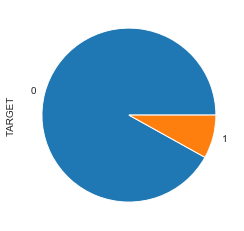

In [99]:
df_app.TARGET.value_counts().plot.pie()
plt.show()

In [100]:
df_app_1 = df_app[df_app.TARGET==1]
df_app_0 = df_app[df_app.TARGET==0]

In [101]:
print(df_app_1.shape)
print(df_app_0.shape)

(24825, 42)
(282686, 42)


### <font color ="green"> Step 4d : Categorical Columns Analysis</font>

In [102]:
#list down all the categorical variables
categoricalcols = list(df_app.select_dtypes(include=['object','category']).columns)
categoricalcols.remove("TARGET")

In [103]:
# total count of categorical variables
len(categoricalcols)

22

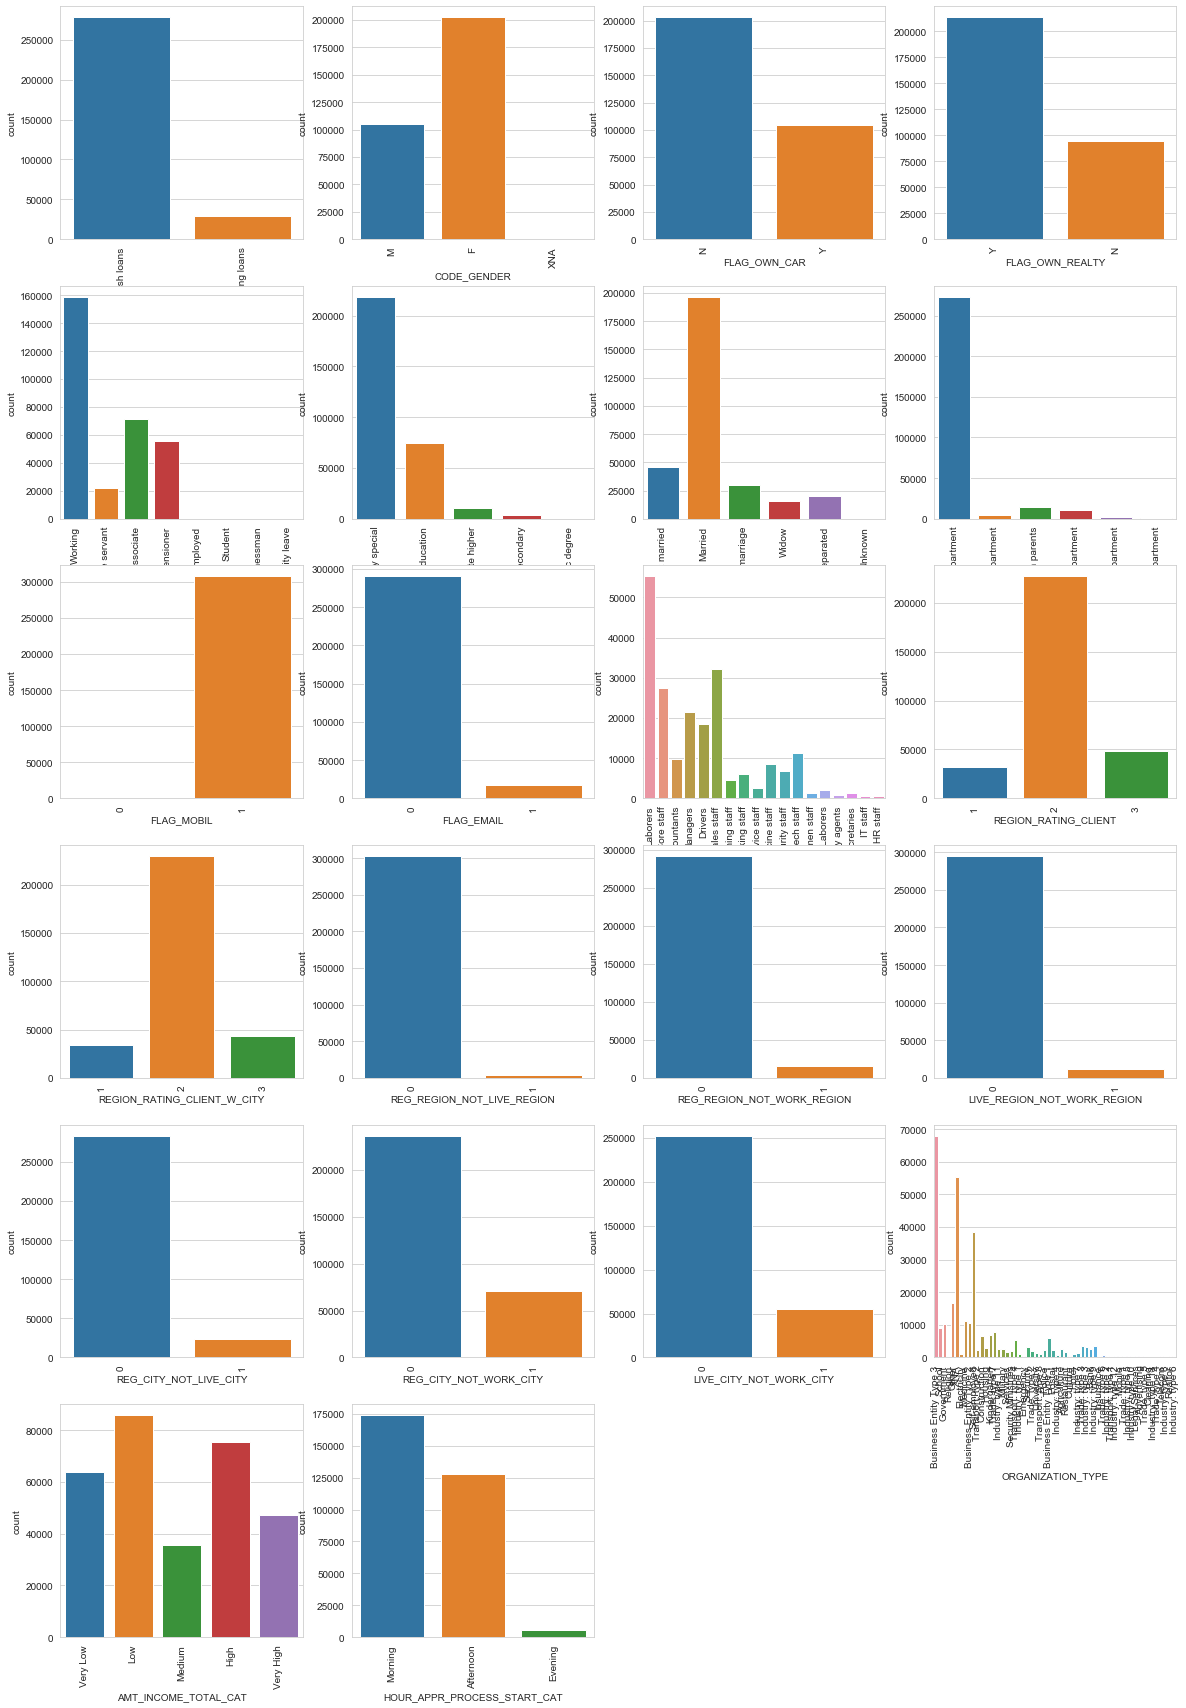

In [104]:
# univariate analysis for all categorical columns
plt.figure(figsize=(20,30))
for catind in range(len(categoricalcols)):
    plt.subplot(6,4,catind+1)
    sns.countplot(x=categoricalcols[catind],data=df_app)
    plt.xticks(rotation=90)
plt.show()

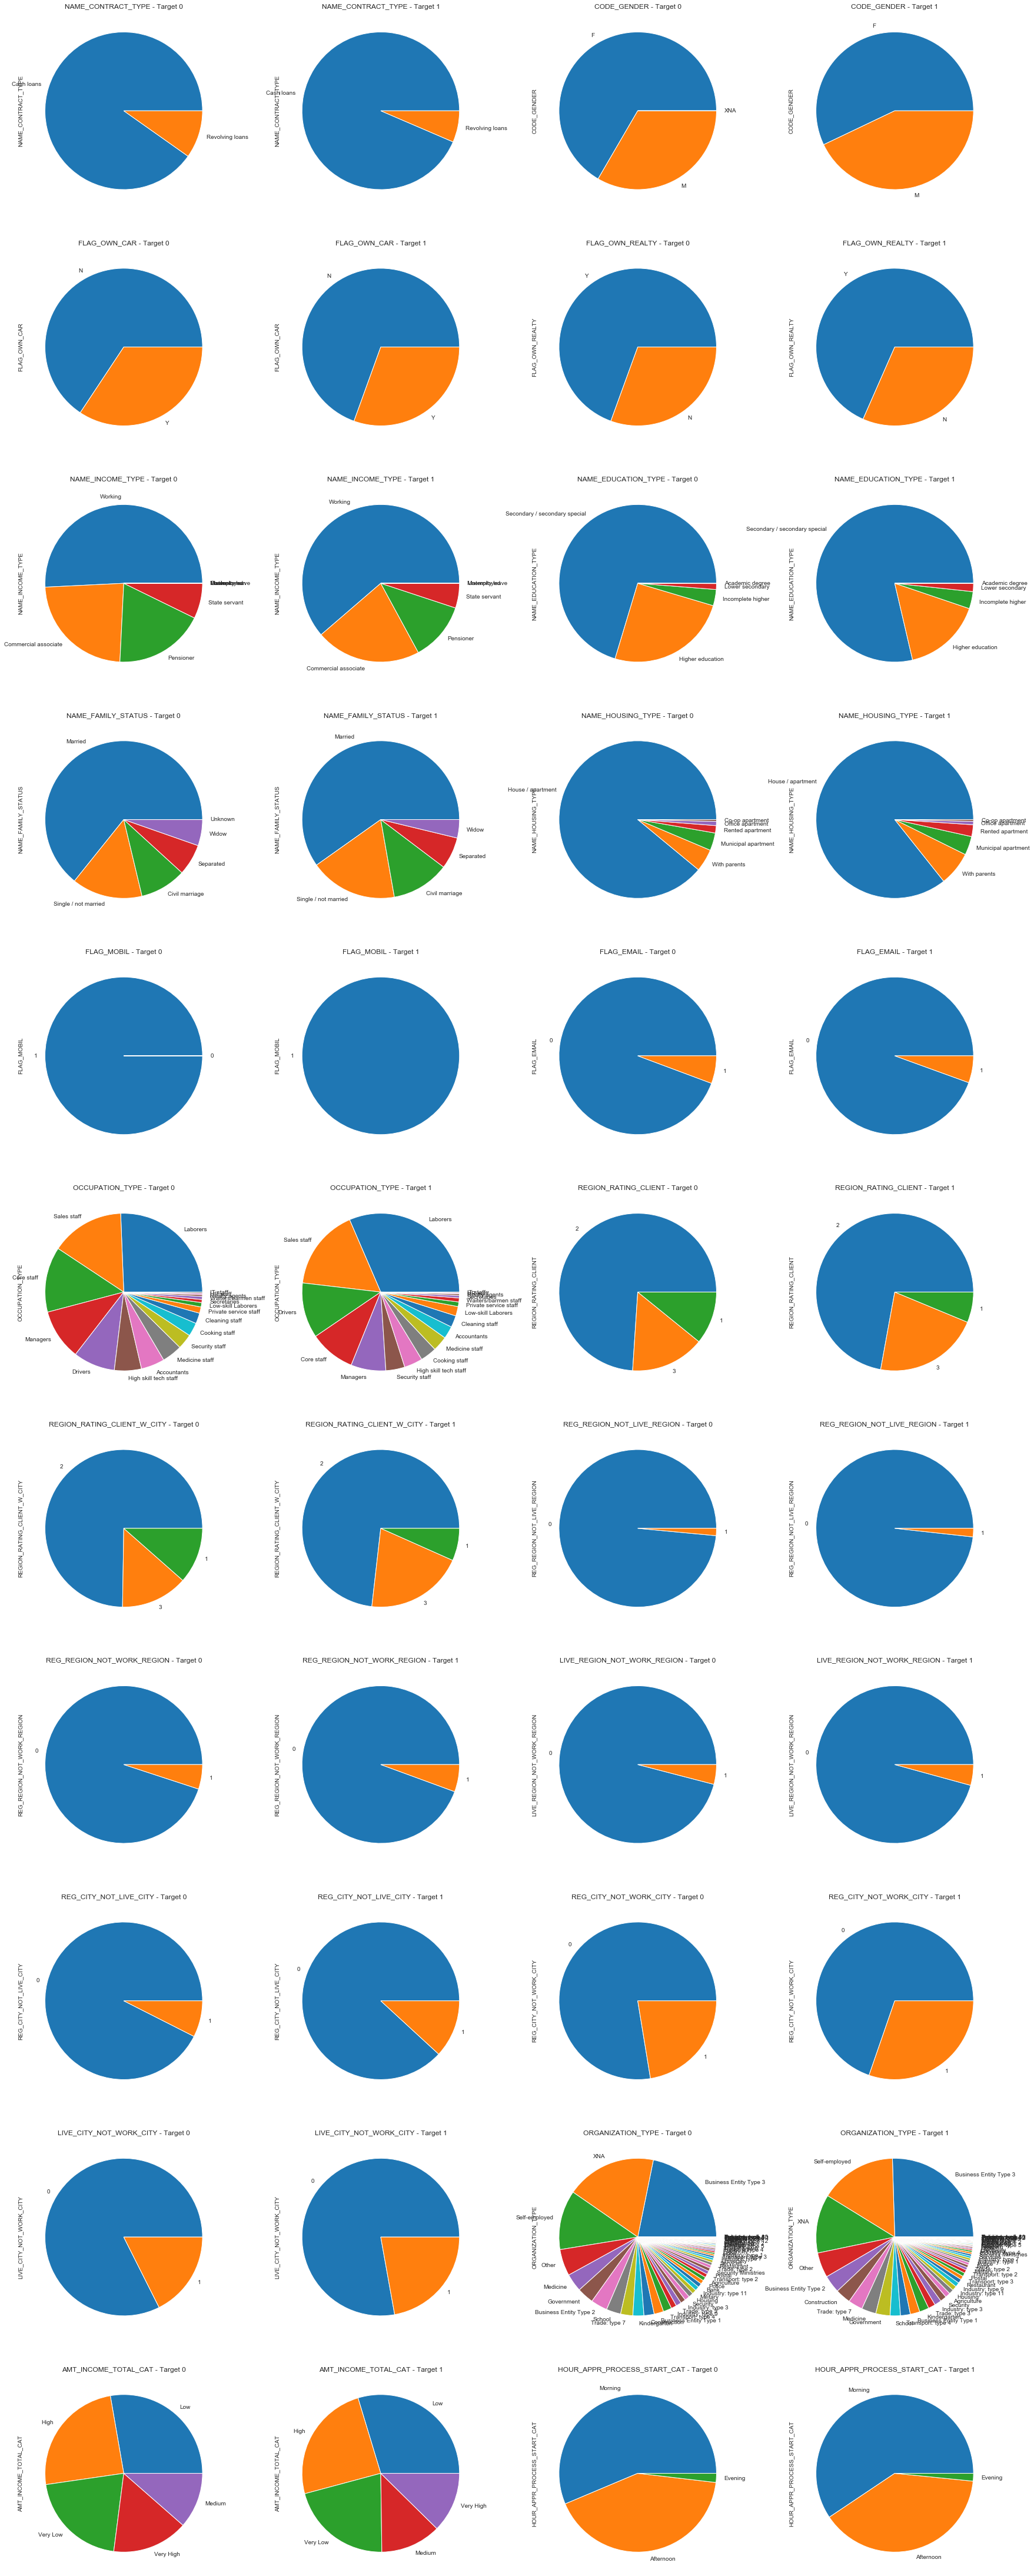

In [105]:
# Bivariate analysis : for a %age analysis - let's use a pie chart comparison between defaulters and non defaulters

plt.figure(figsize=(30,80))
for catind in range(len(categoricalcols)):
    plt.subplot(11,4,2*catind+1)
    df_app_0[categoricalcols[catind]].value_counts(normalize=True).plot.pie()
    plt.title(categoricalcols[catind] + " - Target 0")
    plt.subplot(11,4,2*catind+2)
    df_app_1[categoricalcols[catind]].value_counts(normalize=True).plot.pie()
    plt.title(categoricalcols[catind] + " - Target 1")
plt.show()

### <font color ="green"> Step 4e : Continous Columns Analysis </font>

In [106]:
#list down all the continous variables
contcols = list(df_app.select_dtypes(exclude=['object','category']).columns)
len(contcols)

19

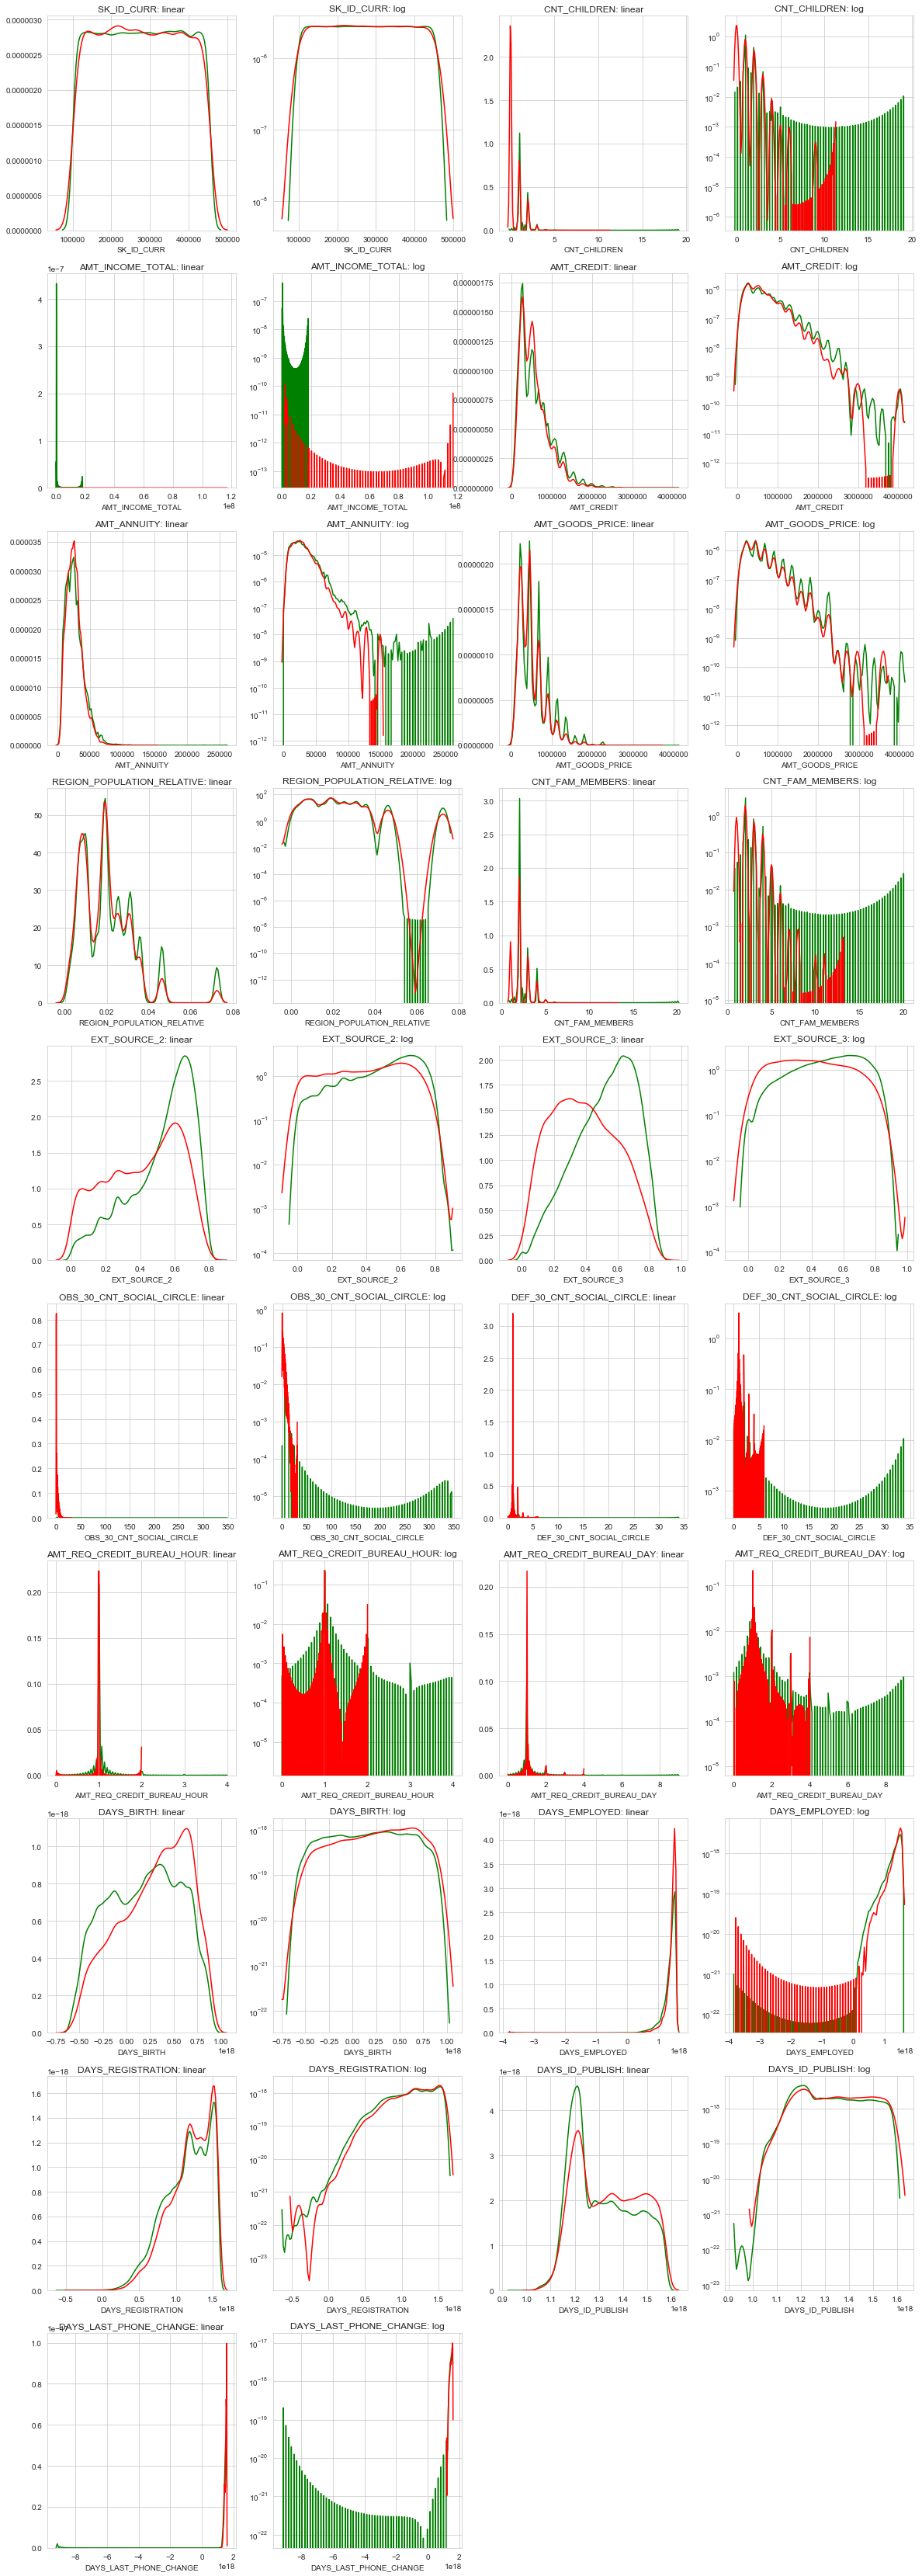

In [107]:
# Bivariate analysis against the target variable:
plt.figure(figsize=(20,60))
for catind in range(len(contcols)):
    # on liner scale
    plt.subplot(10,4,2*catind+1)
    sns.distplot(df_app_0[contcols[catind]],hist=False,color="green")
    sns.distplot(df_app_1[contcols[catind]],hist=False,color="red")
    plt.title(contcols[catind]+": linear")
    
    # on logarithic scale
    plt.subplot(10,4,2*catind+2)
    sns.distplot(df_app_0[contcols[catind]],hist=False,color="green")
    sns.distplot(df_app_1[contcols[catind]],hist=False,color="red")
    plt.yscale("log")
    plt.title(contcols[catind]+": log")
plt.show()

In [108]:
checkcols=['TARGET','CNT_CHILDREN','EXT_SOURCE_2','AMT_CREDIT','EXT_SOURCE_3','DAYS_BIRTH']

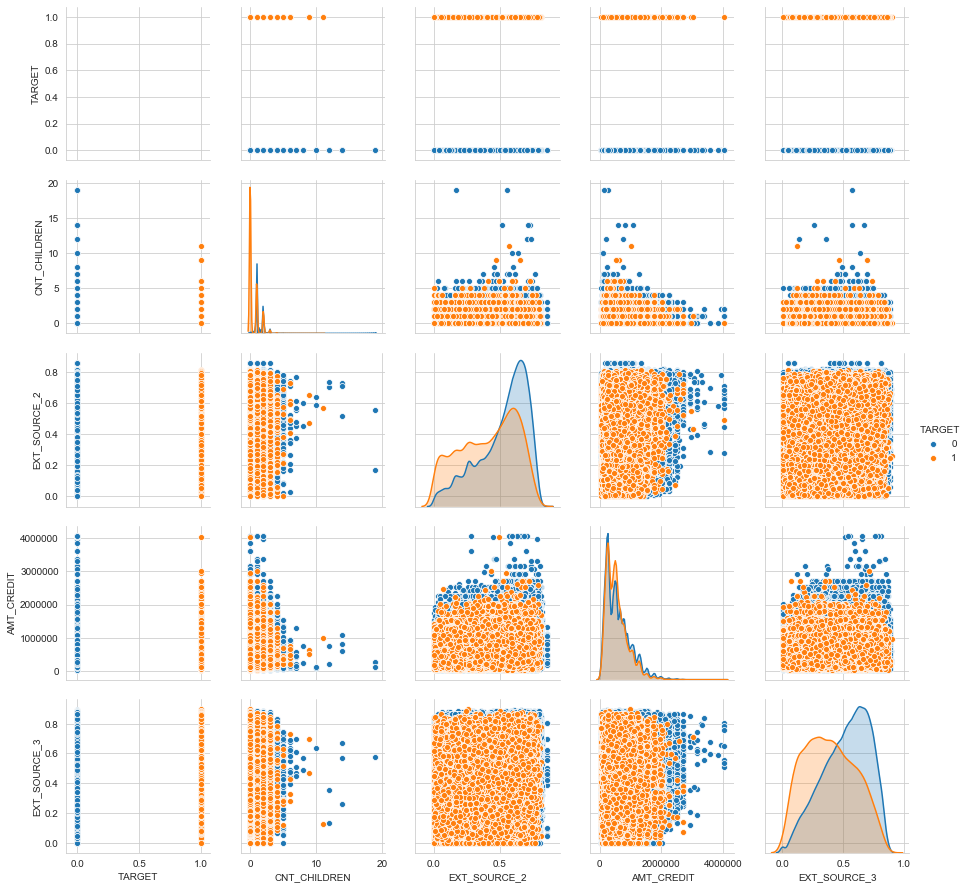

In [109]:
sns.pairplot(df_app[checkcols], hue="TARGET")
plt.show()

# <font color ="blue"> Step 5 : Data Analysis (Previous Applications) </font>

### <font color ="green"> Step 5a : Data Imbalance Check </font>

In [110]:
df_prv.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

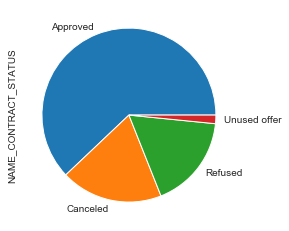

In [111]:
df_prv.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie()
plt.show()

### <font color ="green"> Step 5b : Removing Non-Relevant Columns</font>

In [112]:
# first finding if there are any highly related attributes

corr = df_prv.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr = corr.unstack().reset_index()
corr.columns = ["var1","var2","correlation"]
corr.dropna(subset=["correlation"],inplace=True)
corr["correlationabs"]  = corr["correlation"].abs()
corr.sort_values(by="correlationabs",ascending=False)

var1              var2  correlation  correlationabs
43   AMT_GOODS_PRICE   AMT_APPLICATION     0.999884        0.999884
44   AMT_GOODS_PRICE        AMT_CREDIT     0.993087        0.993087
35        AMT_CREDIT   AMT_APPLICATION     0.975824        0.975824
42   AMT_GOODS_PRICE       AMT_ANNUITY     0.820895        0.820895
34        AMT_CREDIT       AMT_ANNUITY     0.816429        0.816429
26   AMT_APPLICATION       AMT_ANNUITY     0.808872        0.808872
59       CNT_PAYMENT   AMT_APPLICATION     0.680630        0.680630
60       CNT_PAYMENT        AMT_CREDIT     0.674278        0.674278
61       CNT_PAYMENT   AMT_GOODS_PRICE     0.672129        0.672129
58       CNT_PAYMENT       AMT_ANNUITY     0.394535        0.394535
53  SELLERPLACE_AREA   AMT_GOODS_PRICE    -0.015842        0.015842
56       CNT_PAYMENT        SK_ID_PREV     0.015589        0.015589
40   AMT_GOODS_PRICE        SK_ID_PREV     0.015293        0.015293
50  SELLERPLACE_AREA       AMT_ANNUITY    -0.015027        0.015027
16       AMT_ANNUITY        SK_ID_PREV     0.011459        0.011459
62       CNT_PAYMENT  SELLERPLACE_AREA    -0.010646        0.010646
52  SELLERPLACE_AREA        AMT_CREDIT    -0.009567        0.009567
51  SELLERPLACE_AREA   AMT_APPLICATION    -0.007649        0.007649
32        AMT_CREDIT        SK_ID_PREV     0.003659        0.003659
24   AMT_APPLICATION        SK_ID_PREV     0.003302        0.003302
49  SELLERPLACE_AREA        SK_ID_CURR     0.001265        0.001265
48  SELLERPLACE_AREA        SK_ID_PREV    -0.001079        0.001079
17       AMT_ANNUITY        SK_ID_CURR     0.000577        0.000577
41   AMT_GOODS_PRICE        SK_ID_CURR     0.000369        0.000369
8         SK_ID_CURR        SK_ID_PREV    -0.000321        0.000321
25   AMT_APPLICATION        SK_ID_CURR     0.000280        0.000280
33        AMT_CREDIT        SK_ID_CURR     0.000195        0.000195
57       CNT_PAYMENT        SK_ID_CURR     0.000031        0.000031

### <font color ="green"> Step 5c : Data Division Based on Target Variable </font>

In [113]:
# we can split the previous application data in approved and refused (rest can be ignored)
df_prv_app = df_prv[df_prv.NAME_CONTRACT_STATUS=="Approved"]
df_prv_ref = df_prv[df_prv.NAME_CONTRACT_STATUS=="Refused"]

In [114]:
print(df_prv_app.shape)
print(df_prv_ref.shape)

(1036781, 25)
(290678, 25)


### <font color ="green"> Step 5d : Categorical Columns Analysis </font>

In [115]:
categoricalcols = list(df_prv.select_dtypes(include=['object']).columns)
categoricalcols.remove("NAME_CONTRACT_STATUS")

In [116]:
len(categoricalcols)

14

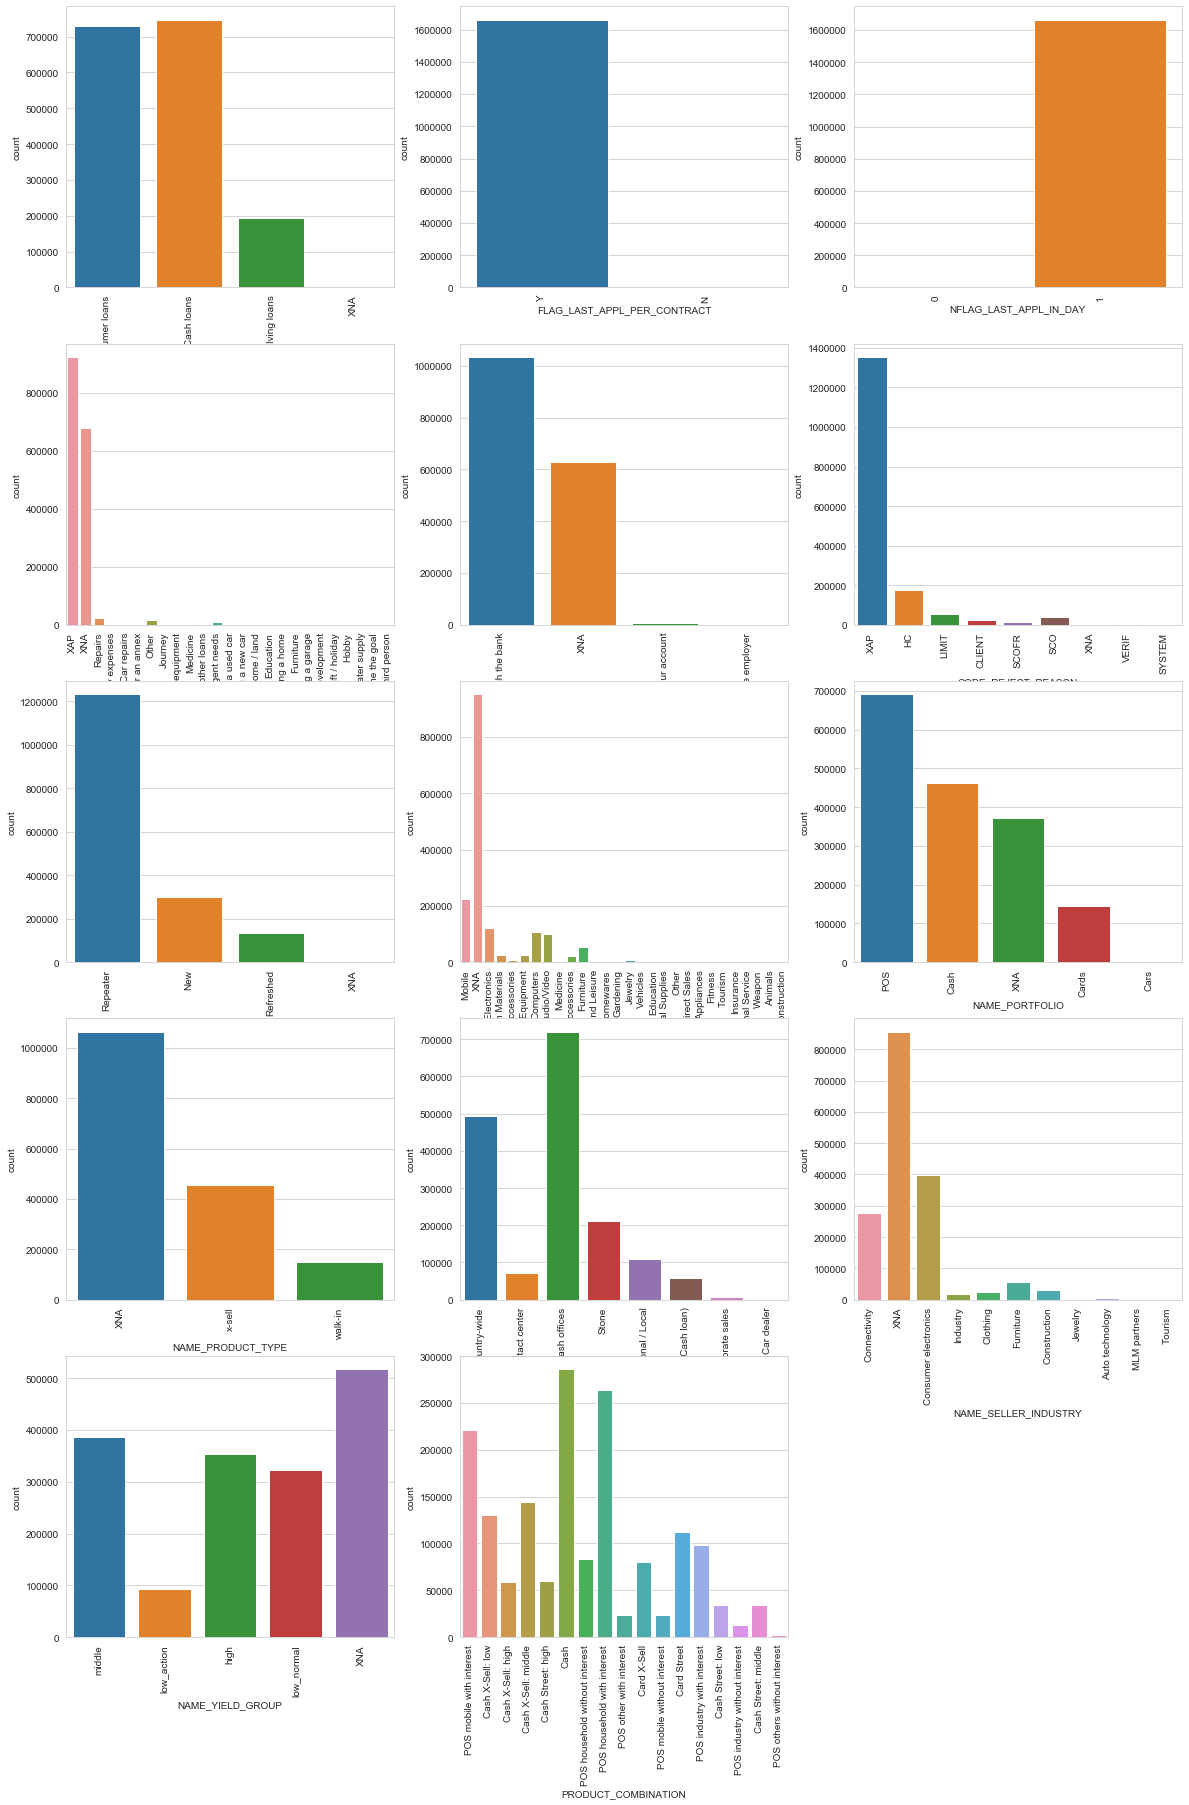

In [117]:
# univariate analysis for all categorical columns
plt.figure(figsize=(20,30))
for catind in range(len(categoricalcols)):
    plt.subplot(5,3,catind+1)
    sns.countplot(x=categoricalcols[catind],data=df_prv)
    plt.xticks(rotation=90)
plt.show()

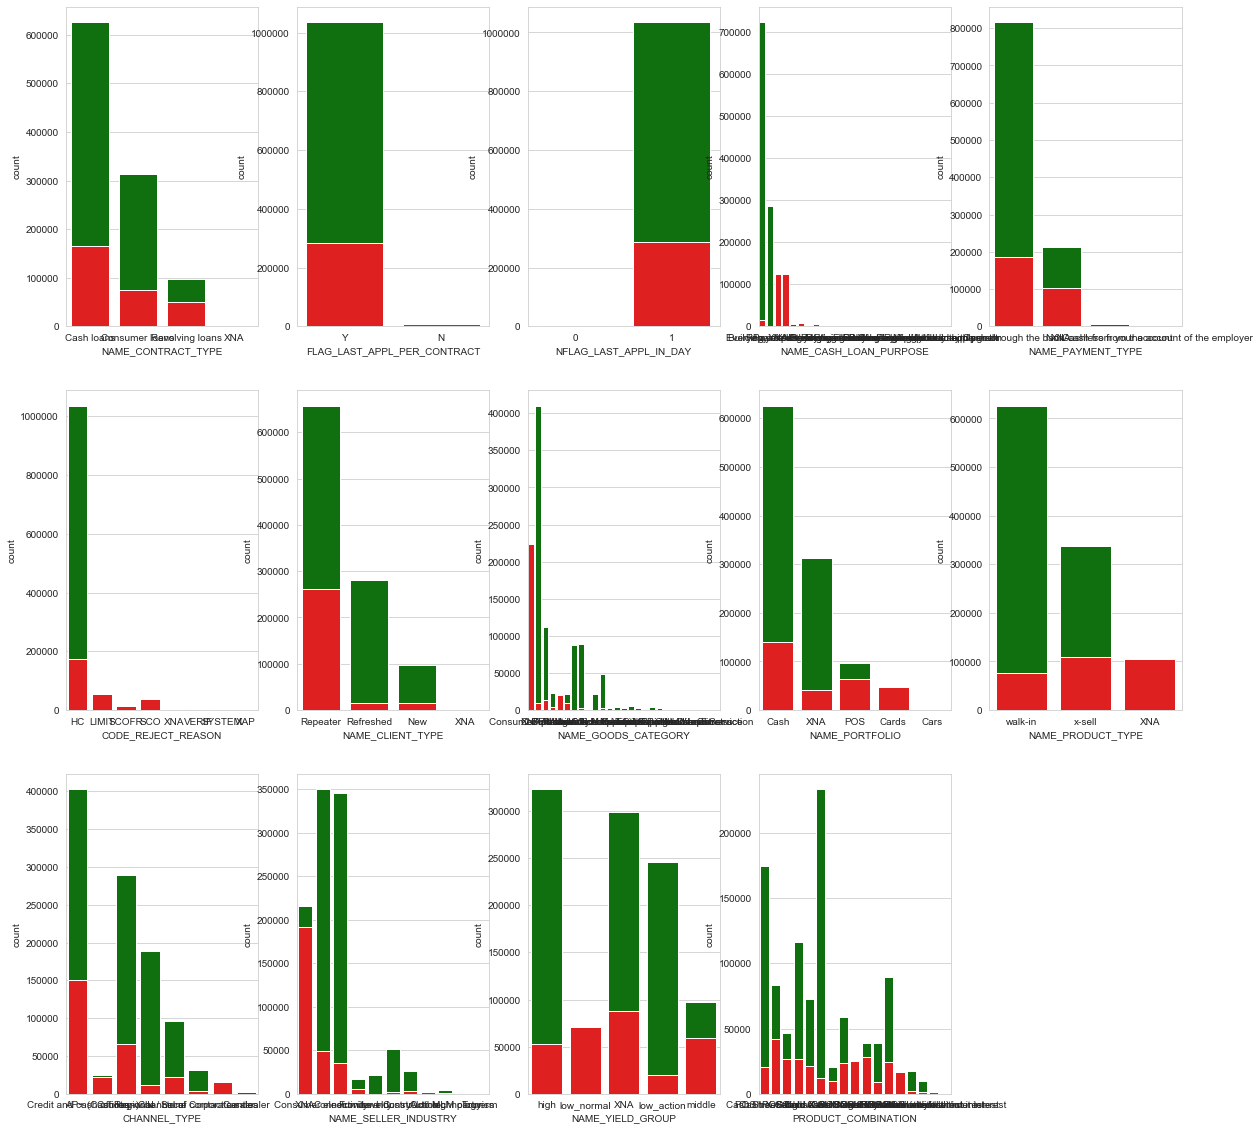

In [118]:
# Bivariate analysis : 
# First let us see how the different categorical variable counts are there for refused (red) and approved (green) cases

plt.figure(figsize=(20,20))
for catind in range(len(categoricalcols)):
    plt.subplot(3,5,catind+1)
    sns.countplot(df_prv_app[categoricalcols[catind]],color="green")
    sns.countplot(df_prv_ref[categoricalcols[catind]],color="red")
plt.show()

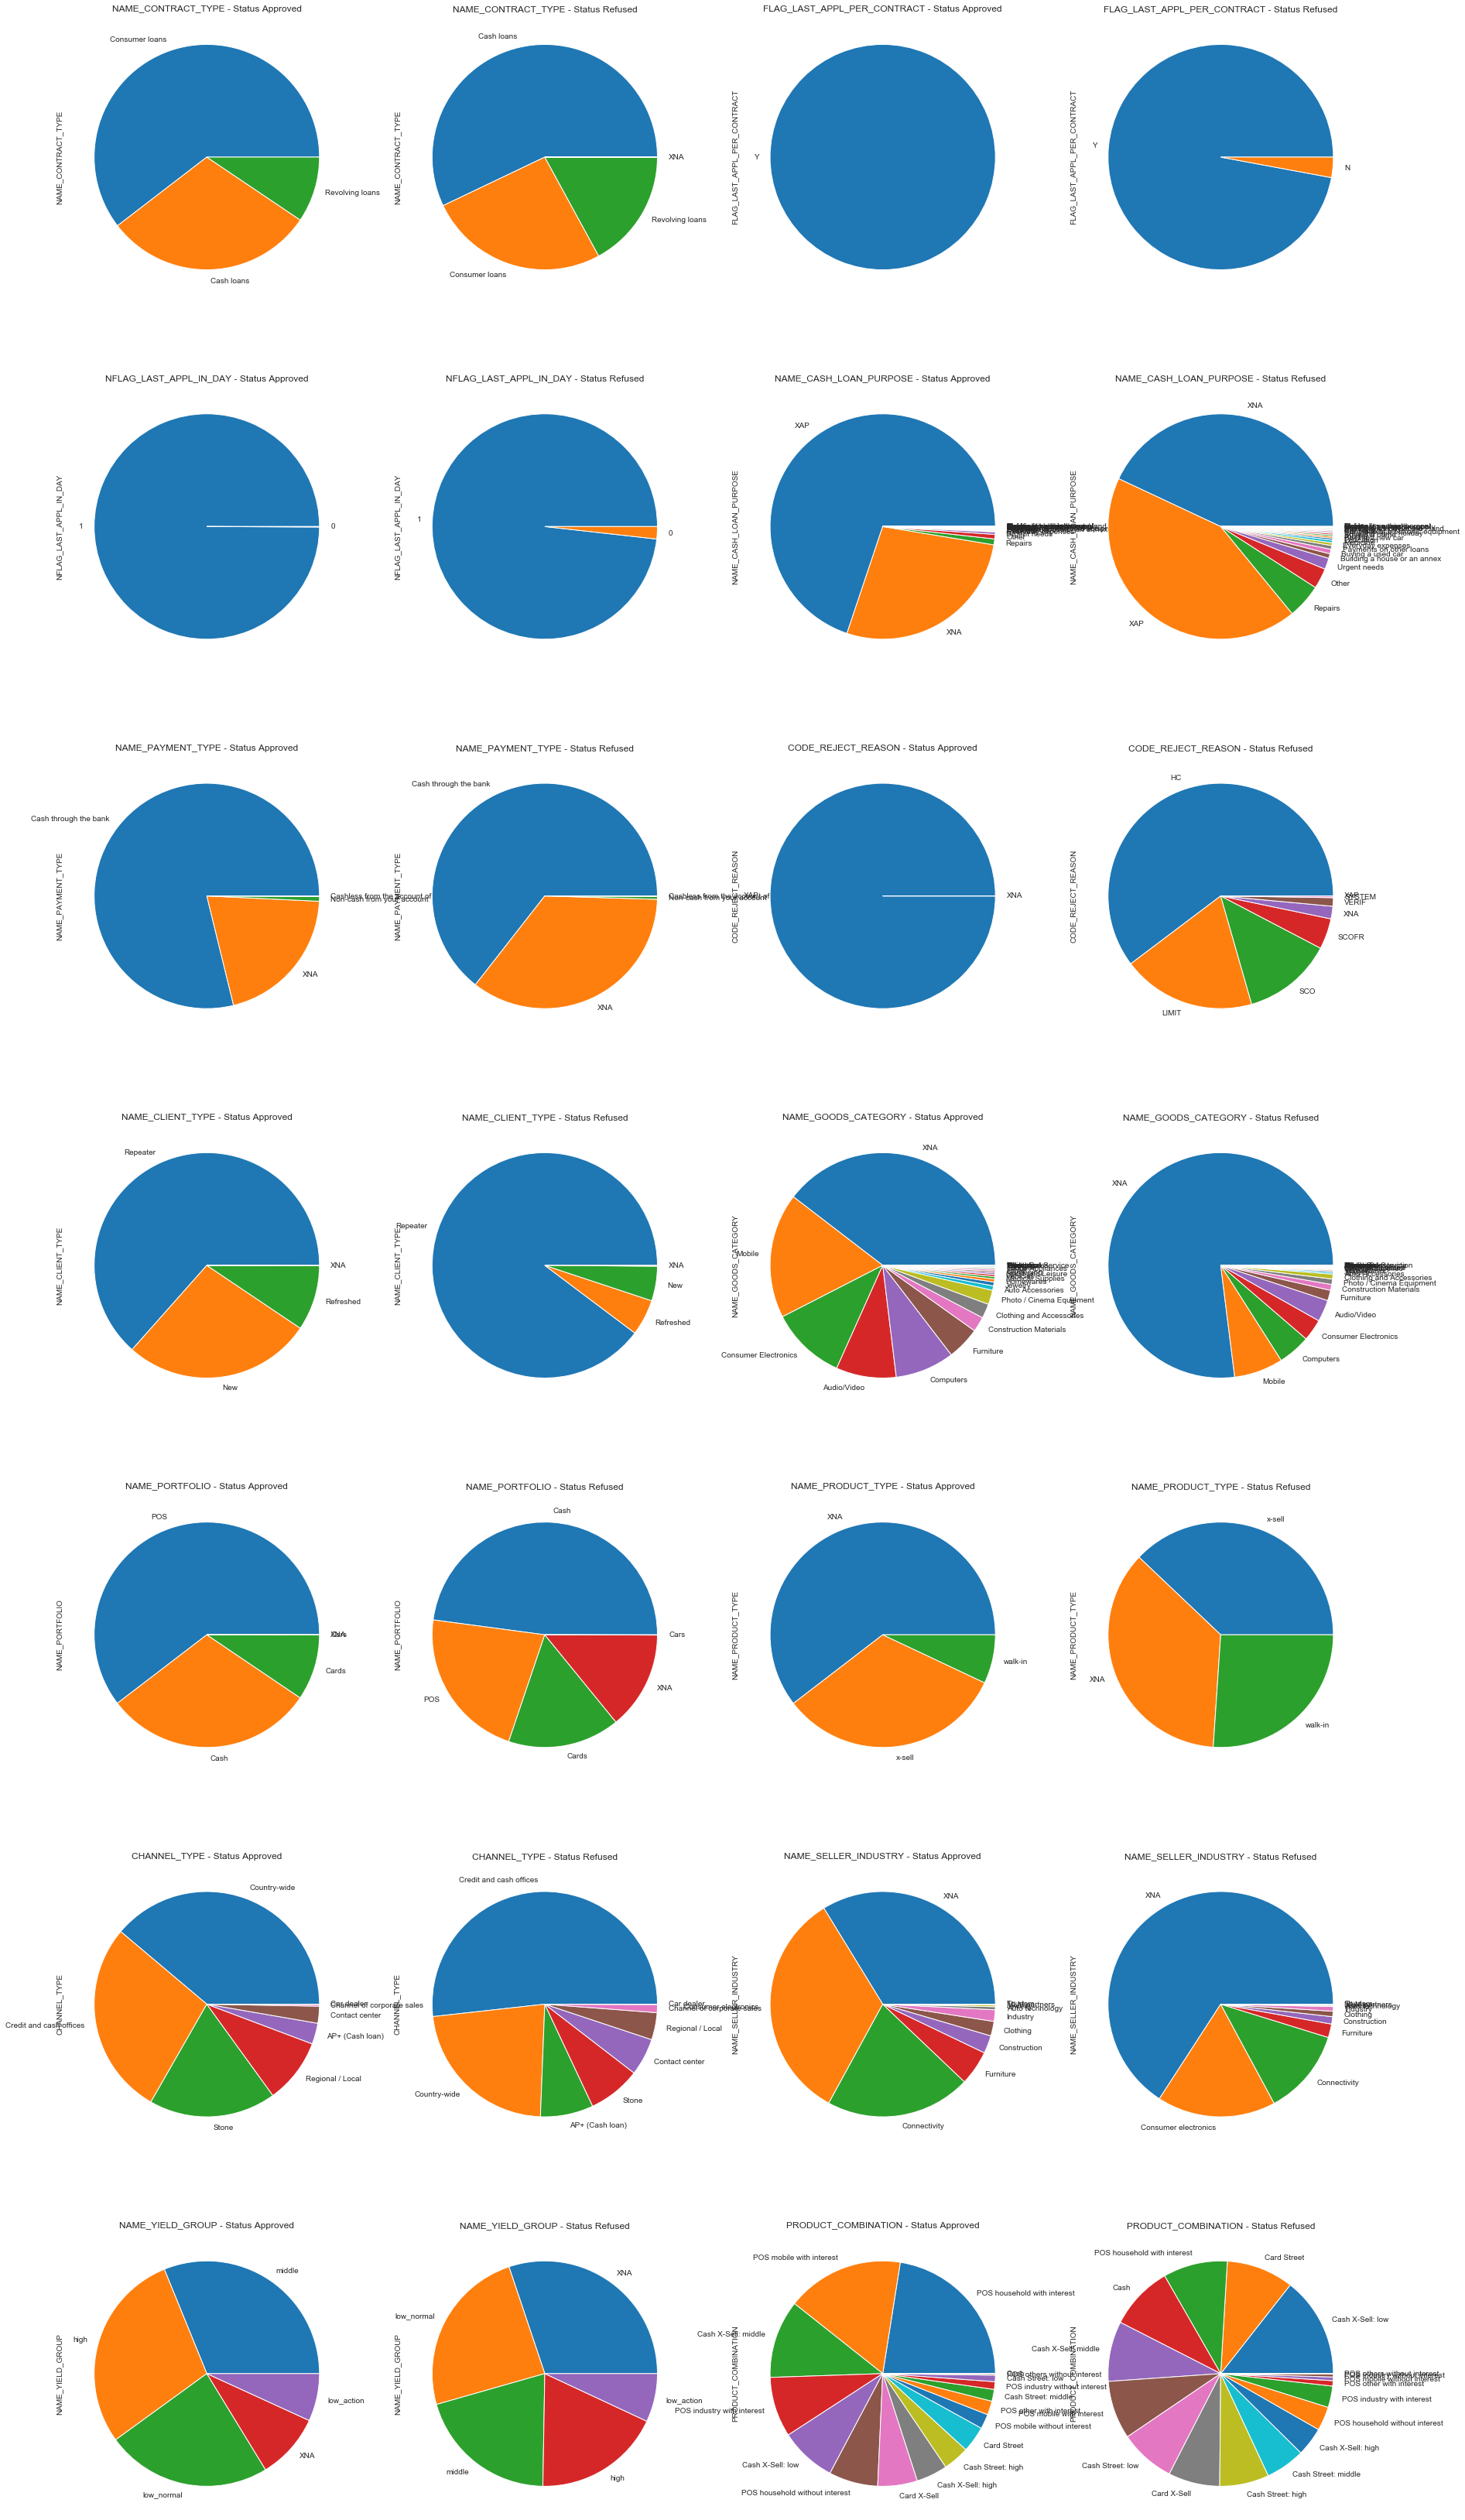

In [119]:
# Bivariate analysis : for a %age analysis - let's use a pie chart comparison between approved and refused

plt.figure(figsize=(30,60))
for catind in range(len(categoricalcols)):
    plt.subplot(7,4,2*catind+1)
    df_prv_app[categoricalcols[catind]].value_counts(normalize=True).plot.pie()
    plt.title(categoricalcols[catind] + " - Status Approved")
    plt.subplot(7,4,2*catind+2)
    df_prv_ref[categoricalcols[catind]].value_counts(normalize=True).plot.pie()
    plt.title(categoricalcols[catind] + " - Status Refused")
plt.show()


### <font color ="green"> Step 5e : Continous Columns Analysis </font>

In [120]:
#list down all the continous variables
contcols = list(df_prv.select_dtypes(exclude=['object','category']).columns)
len(contcols)

9

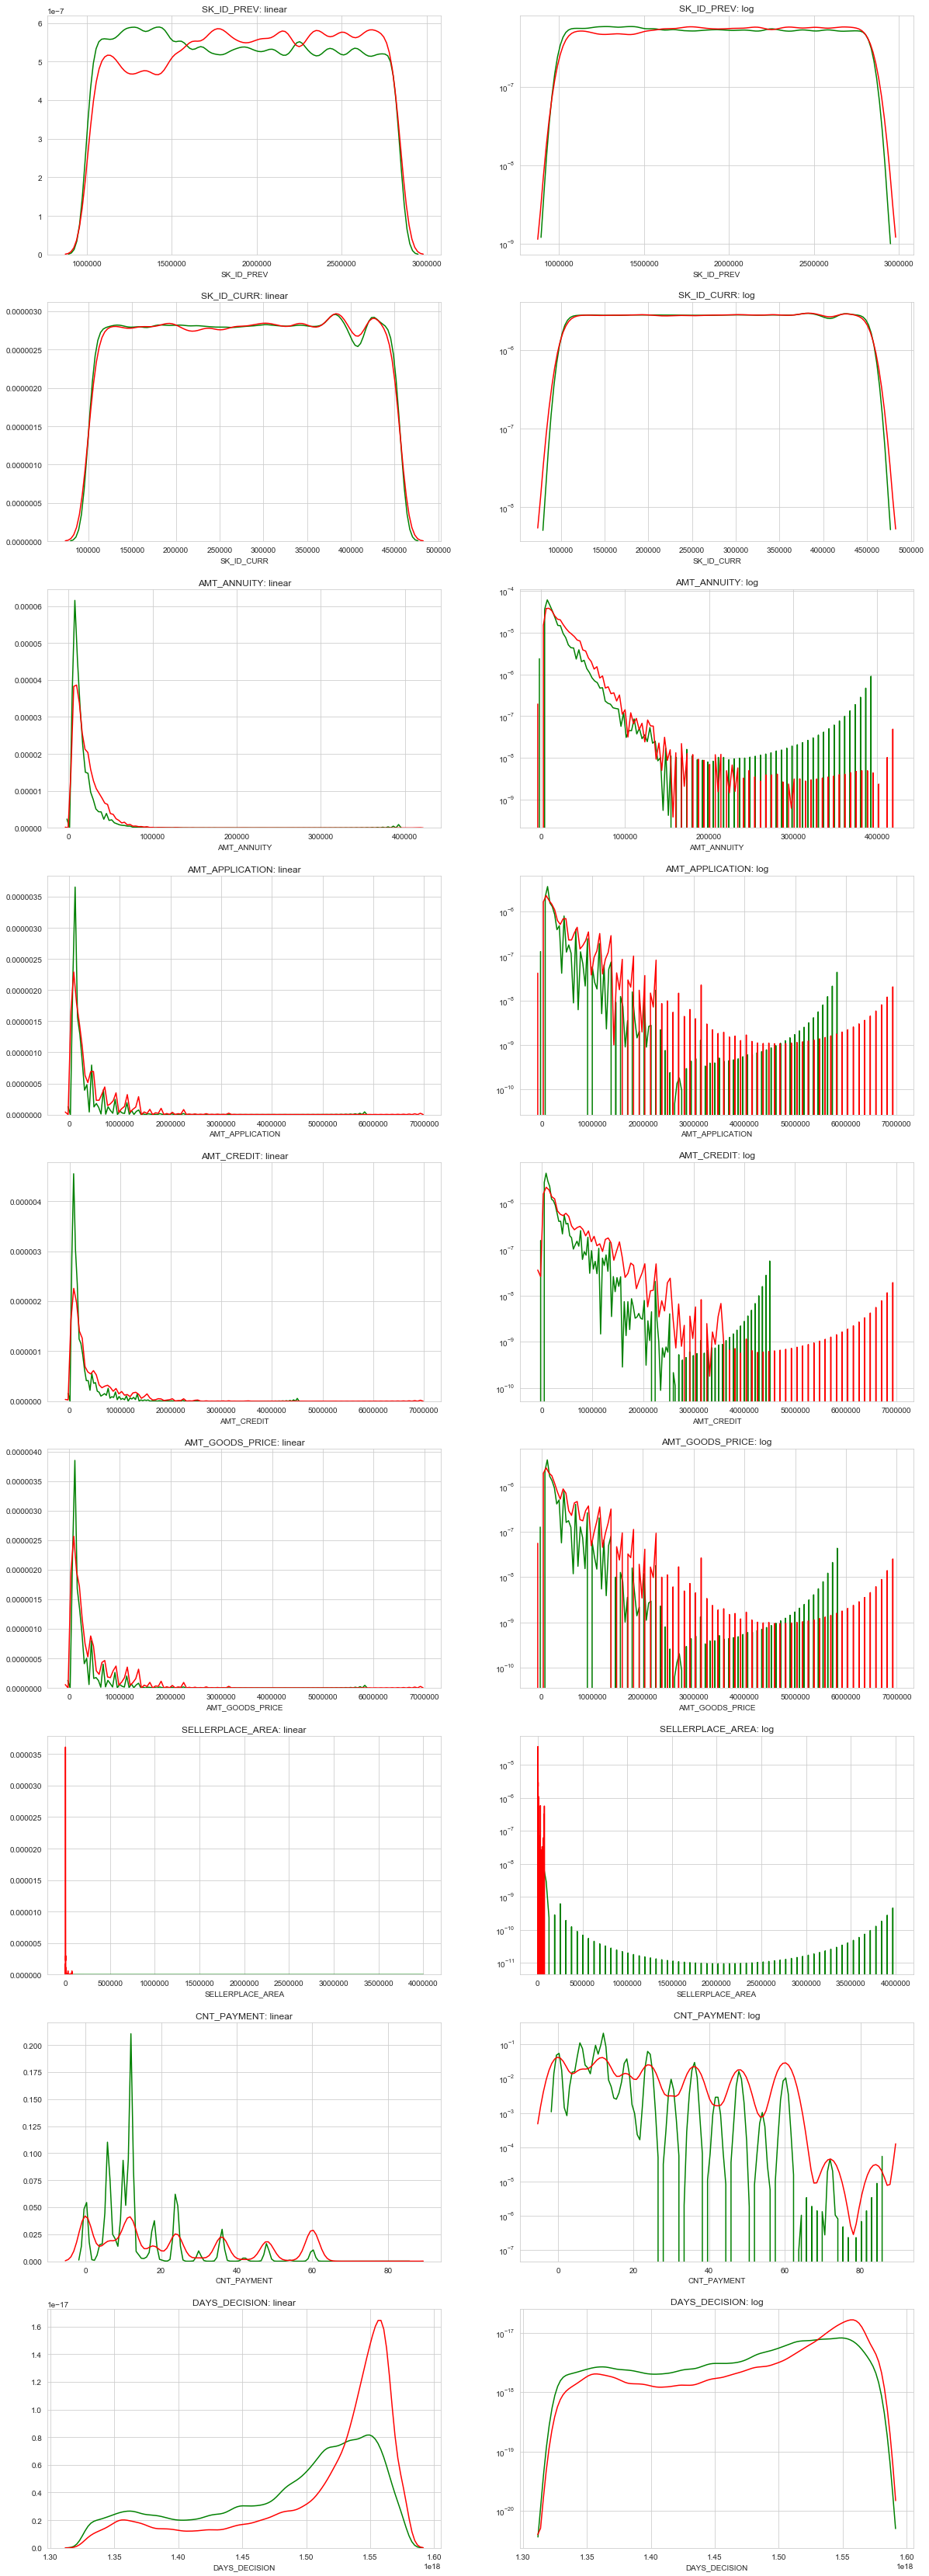

In [121]:
# plotting all continous variables
plt.figure(figsize=(20,60))
for catind in range(len(contcols)):
    # on linear scale
    plt.subplot(9,2,2*catind+1)
    sns.distplot(df_prv_app[contcols[catind]],hist=False,color="green")
    sns.distplot(df_prv_ref[contcols[catind]],hist=False,color="red")
    plt.title(contcols[catind]+": linear")
    # on logarithmic scale
    plt.subplot(9,2,2*catind+2)
    sns.distplot(df_prv_app[contcols[catind]],hist=False,color="green")
    sns.distplot(df_prv_ref[contcols[catind]],hist=False,color="red")
    plt.yscale("log")
    plt.title(contcols[catind]+": log")
plt.show()

# <font color ="blue"> Step 6 : Joint Data Analysis (Application + Previous Applications) </font>

### <font color ="green"> Step 6a : Data Join </font>

In [122]:
# before join the original dataframes
print(df_app.shape)
print(df_prv.shape)

(307511, 42)
(1670214, 25)


In [123]:
# created an inner join
df_comb = df_app.merge(df_prv,how="left",on="SK_ID_CURR")

In [124]:
df_comb.shape

(1430155, 66)

In [125]:
# now even the combined one needs to be split into two dataframes based on the target variable
df_comb_1 = df_comb[df_comb.TARGET == 1]
df_comb_0 = df_comb[df_comb.TARGET == 0]

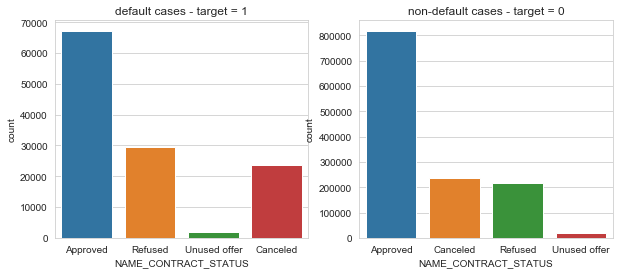

In [126]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df_comb_1.NAME_CONTRACT_STATUS)
plt.title("default cases - target = 1")
plt.subplot(1,2,2)
sns.countplot(df_comb_0.NAME_CONTRACT_STATUS)
plt.title("non-default cases - target = 0")
plt.show()

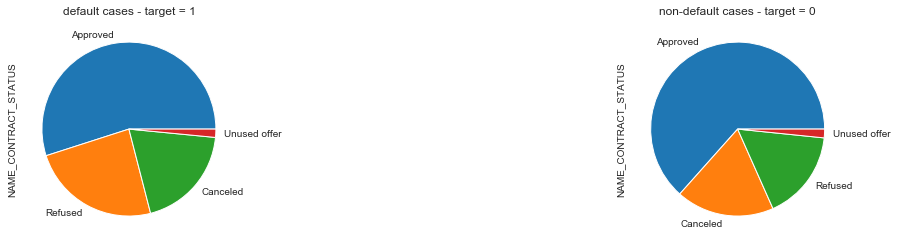

In [127]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
df_comb_1.NAME_CONTRACT_STATUS.value_counts().plot.pie()
plt.title("default cases - target = 1")
plt.subplot(1,2,2)
df_comb_0.NAME_CONTRACT_STATUS.value_counts().plot.pie()
plt.title("non-default cases - target = 0")
plt.show()

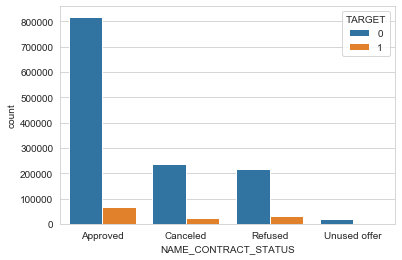

In [128]:
sns.countplot(df_comb.NAME_CONTRACT_STATUS,hue=df_comb.TARGET)
plt.show()

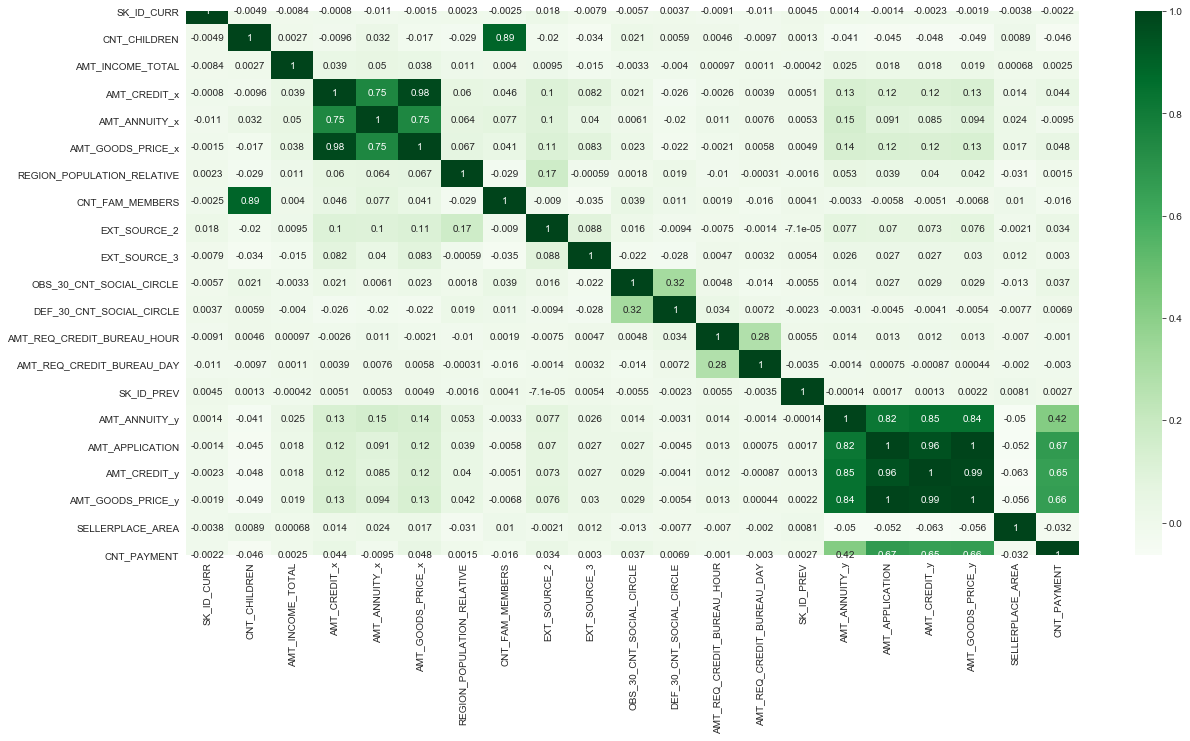

In [129]:
# Let's try finding correlations where target = 1 (i.e. default) and status was approved
plt.figure(figsize=(20,10))
sns.heatmap(df_comb_1[df_comb_1.NAME_CONTRACT_STATUS=="Approved"].corr(),annot=True,cmap="Greens")
plt.show()

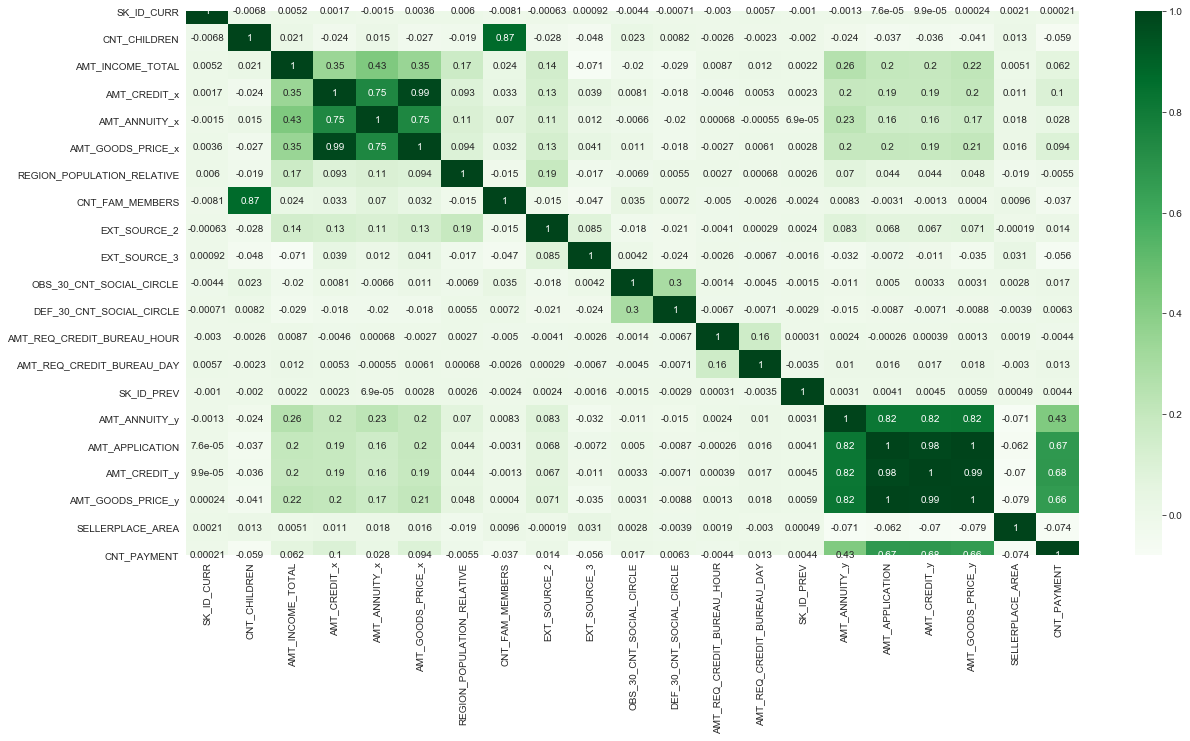

In [130]:
# Let's try finding correlations where target = 1 (i.e. default) and status was approved
plt.figure(figsize=(20,10))
sns.heatmap(df_comb_0[df_comb_0.NAME_CONTRACT_STATUS=="Refused"].corr(),annot=True,cmap="Greens")
plt.show()

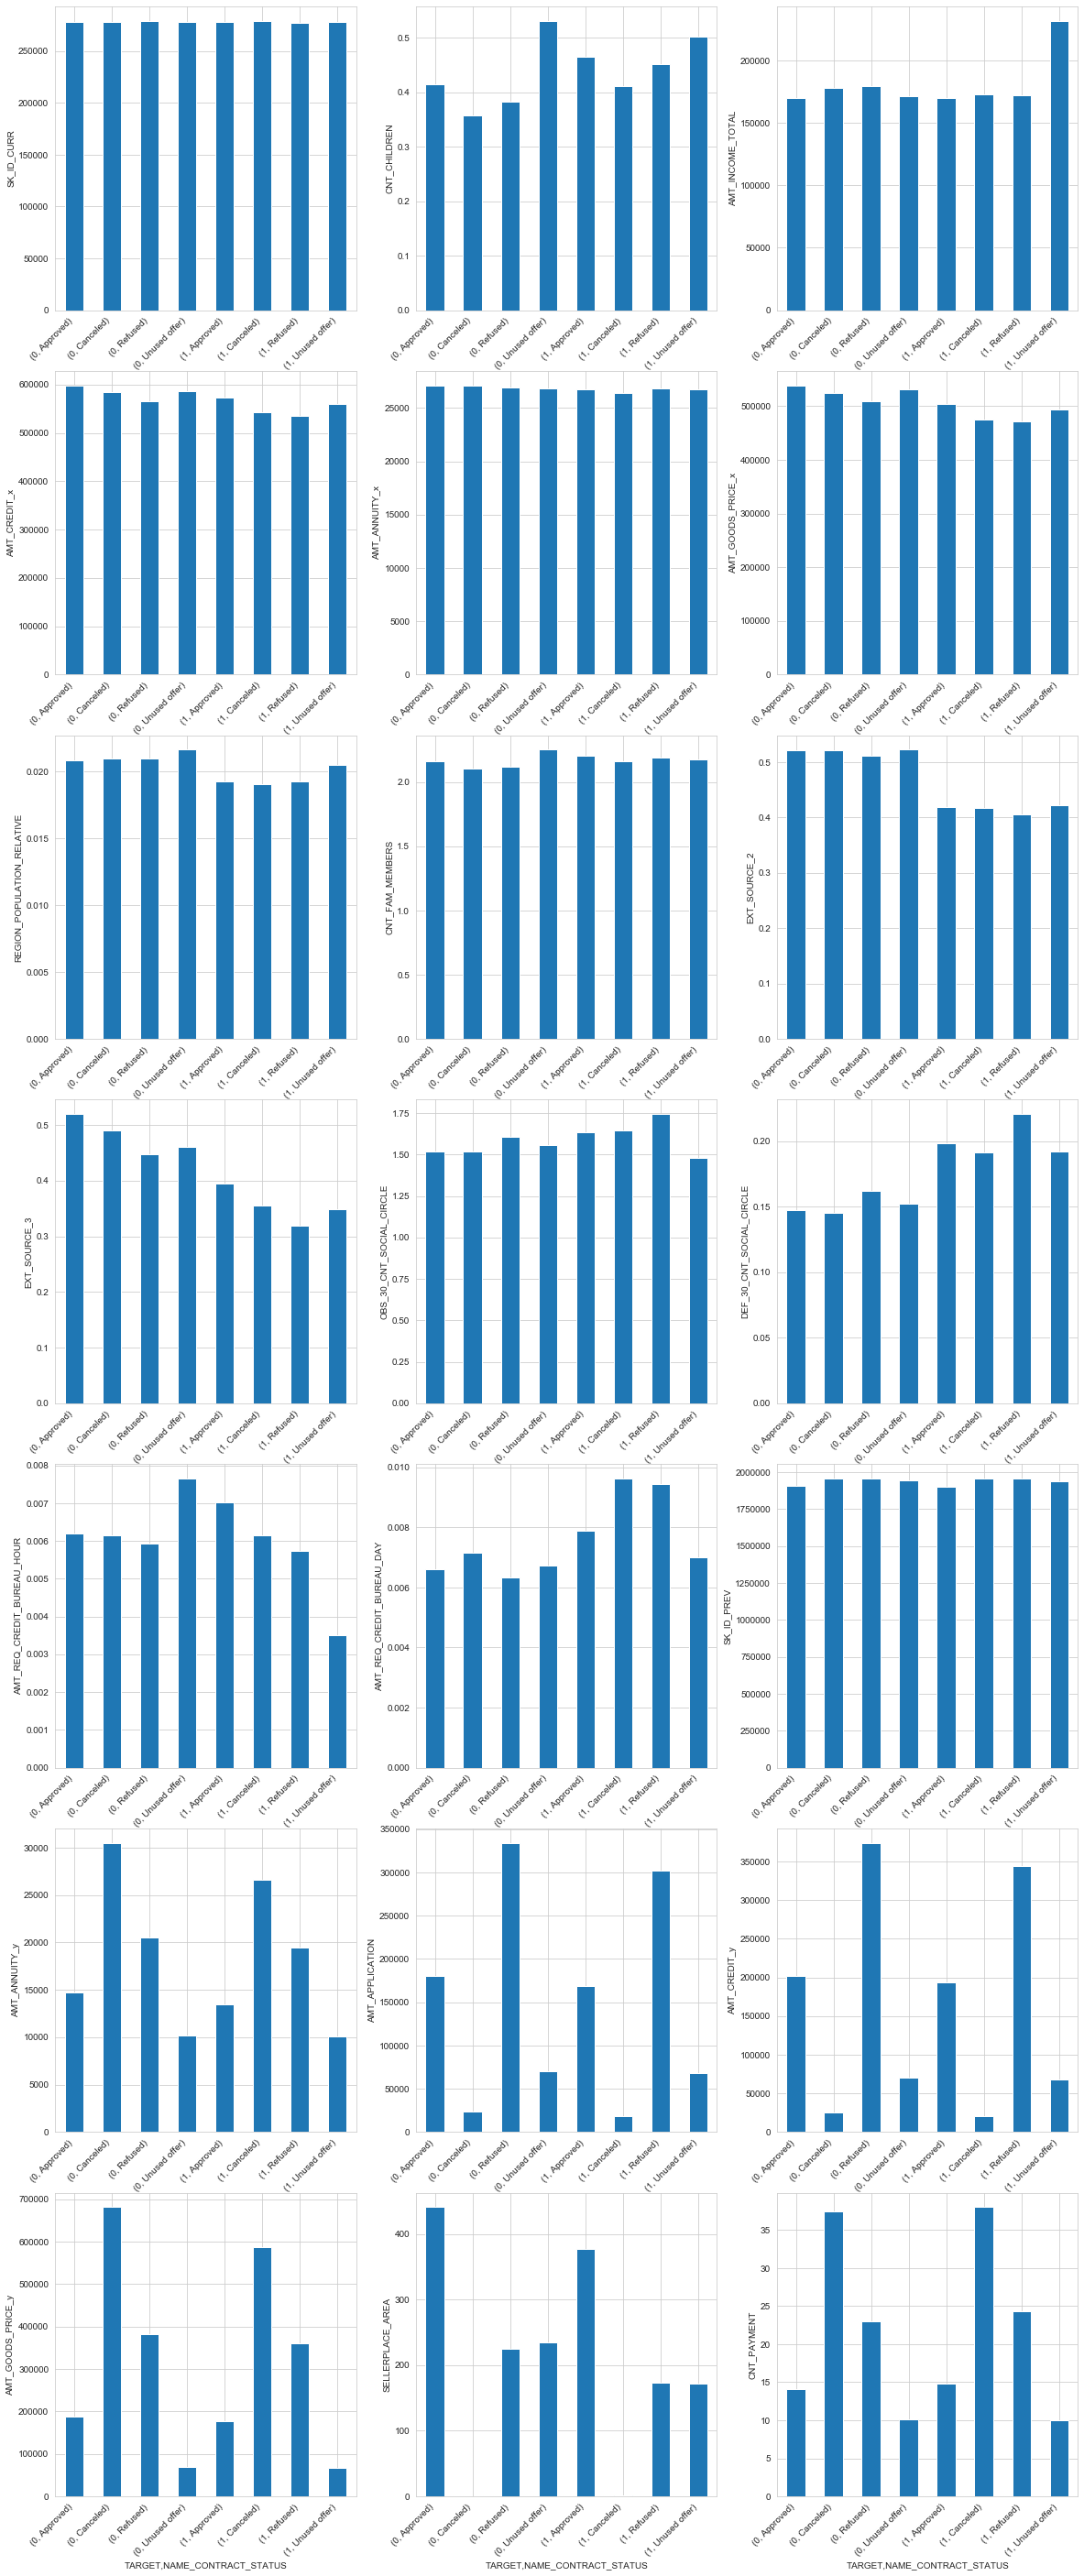

In [131]:
# univariate analysis for all categorical columns
%matplotlib inline
allcols = list(df_comb.select_dtypes(exclude=['object','category','datetime64[ns]']).columns)

plt.figure(figsize=(20,50))
for catind in range(len(allcols)):
    plt.subplot(7,3,catind+1)
    df_comb.groupby(['TARGET','NAME_CONTRACT_STATUS'])[allcols[catind]].mean().plot.bar()
    plt.ylabel(allcols[catind])
    plt.xticks(rotation=45,horizontalalignment='right')
plt.show()